In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:

matches = pd.read_csv("../data/matches.csv")


In [3]:
print(matches)

           id   season        city        date   match_type  player_of_match  \
0      335982  2007/08   Bangalore  2008-04-18       League      BB McCullum   
1      335983  2007/08  Chandigarh  2008-04-19       League       MEK Hussey   
2      335984  2007/08       Delhi  2008-04-19       League      MF Maharoof   
3      335985  2007/08      Mumbai  2008-04-20       League       MV Boucher   
4      335986  2007/08     Kolkata  2008-04-20       League        DJ Hussey   
...       ...      ...         ...         ...          ...              ...   
1090  1426307     2024   Hyderabad  2024-05-19       League  Abhishek Sharma   
1091  1426309     2024   Ahmedabad  2024-05-21  Qualifier 1         MA Starc   
1092  1426310     2024   Ahmedabad  2024-05-22   Eliminator         R Ashwin   
1093  1426311     2024     Chennai  2024-05-24  Qualifier 2    Shahbaz Ahmed   
1094  1426312     2024     Chennai  2024-05-26        Final         MA Starc   

                                       

In [4]:
matches['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', nan, 'Rajkot', 'Kanpur', 'Bengaluru', 'Dubai',
       'Sharjah', 'Navi Mumbai', 'Lucknow', 'Guwahati', 'Mohali'],
      dtype=object)

In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [6]:
matches = matches.dropna(subset=['winner'])


In [7]:
matches['player_of_match'] = matches['player_of_match'].fillna('Unknown')


In [8]:
matches.drop(['id', 'city', 'method'], axis=1, inplace=True)


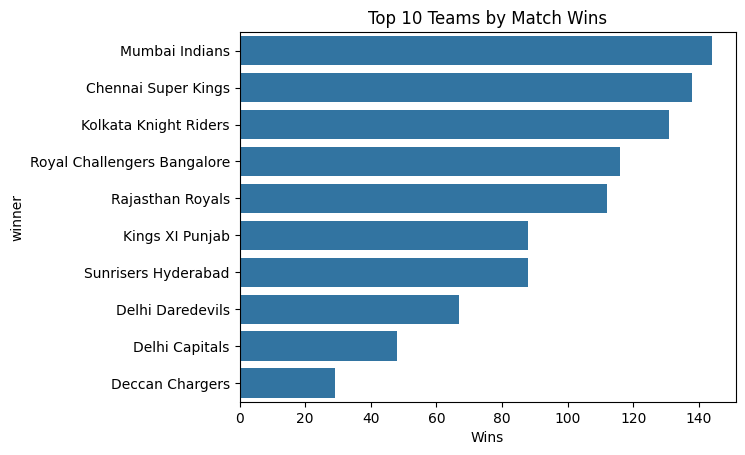

In [9]:
top_teams = matches['winner'].value_counts().head(10)
sns.barplot(x=top_teams.values, y=top_teams.index)
plt.title("Top 10 Teams by Match Wins")
plt.xlabel("Wins")
plt.show()


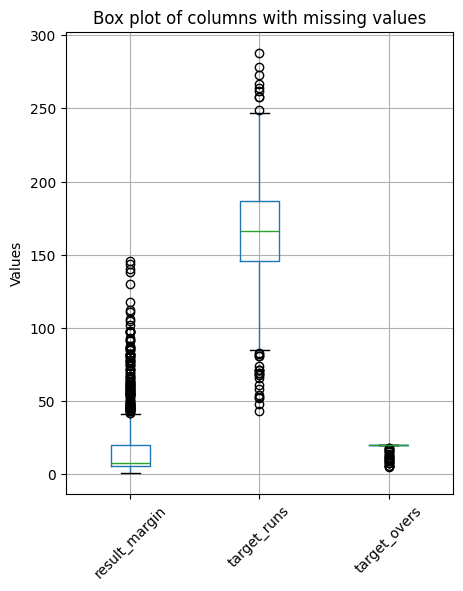

In [10]:

columns_to_handle_missing = ['result_margin', 'target_runs', 'target_overs']

plt.figure(figsize=(5, 6))
matches[columns_to_handle_missing].boxplot()
plt.title('Box plot of columns with missing values')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [11]:
matches['result_margin'] = matches['result_margin'].fillna(matches['result_margin'].median())
matches['target_runs'] = matches['target_runs'].fillna(matches['target_runs'].median())
matches['target_overs'] = matches['target_overs'].fillna(matches['target_overs'].median())
matches

,season,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
0,2007/08,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen
1,2007/08,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,MR Benson,SL Shastri
2,2007/08,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,Aleem Dar,GA Pratapkumar
3,2007/08,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,SJ Davis,DJ Harper
4,2007/08,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2024,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,Nitin Menon,VK Sharma
1091,2024,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,AK Chaudhary,R Pandit
1092,2024,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,2024,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,Nitin Menon,VK Sharma


In [12]:

matches['date'] = pd.to_datetime(matches['date'])
matches['year'] = matches['date'].dt.year
matches['month'] = matches['date'].dt.month
matches['day'] = matches['date'].dt.day

matches.drop('date', axis=1, inplace=True)

In [13]:

def split_season(season):
    if '/' in season:
        start, end = season.split('/')
        start = int(start)
        end = int('20' + end) if len(end) == 2 else int(end)
    else:
        start = end = int(season)
    return start, end

matches[['season_start', 'season_end']] = matches['season'].apply(lambda x: pd.Series(split_season(x)))

matches['season_start'] = pd.to_datetime(matches['season_start'], format='%Y').dt.year
matches['season_end'] = pd.to_datetime(matches['season_end'], format='%Y').dt.year


In [14]:
team_name_mapping = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings',
    'Rising Pune Supergiants': 'Pune Warriors',
    'Rising Pune Supergiant': 'Pune Warriors',
    'Gujarat Lions': 'Gujarat Titans',
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
}

team_columns = ['winner', 'team1', 'team2', 'toss_winner']

matches[team_columns] = matches[team_columns].replace(team_name_mapping)


In [15]:
matches.head()


,season,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,...,target_runs,target_overs,super_over,umpire1,umpire2,year,month,day,season_start,season_end
0,2007/08,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,...,223.0,20.0,N,Asad Rauf,RE Koertzen,2008,4,18,2007,2008
1,2007/08,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,...,241.0,20.0,N,MR Benson,SL Shastri,2008,4,19,2007,2008
2,2007/08,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,...,130.0,20.0,N,Aleem Dar,GA Pratapkumar,2008,4,19,2007,2008
3,2007/08,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,...,166.0,20.0,N,SJ Davis,DJ Harper,2008,4,20,2007,2008
4,2007/08,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,...,111.0,20.0,N,BF Bowden,K Hariharan,2008,4,20,2007,2008


Stadium analysis 

In [16]:
stadium_df = matches[['venue','result']]
stadium_df_3 = pd.DataFrame(stadium_df)


In [17]:
stadium_df_3

,venue,result
0,M Chinnaswamy Stadium,runs
1,"Punjab Cricket Association Stadium, Mohali",runs
2,Feroz Shah Kotla,wickets
3,Wankhede Stadium,wickets
4,Eden Gardens,wickets
...,...,...
1090,"Rajiv Gandhi International Stadium, Uppal, Hyd...",wickets
1091,"Narendra Modi Stadium, Ahmedabad",wickets
1092,"Narendra Modi Stadium, Ahmedabad",wickets
1093,"MA Chidambaram Stadium, Chepauk, Chennai",runs


In [18]:
grouped = stadium_df_3.groupby(['venue', 'result']).size().reset_index(name='new_result')
grouped

,venue,result,new_result
0,Arun Jaitley Stadium,runs,7
1,Arun Jaitley Stadium,tie,1
2,Arun Jaitley Stadium,wickets,6
3,"Arun Jaitley Stadium, Delhi",runs,9
4,"Arun Jaitley Stadium, Delhi",wickets,7
...,...,...,...
120,Wankhede Stadium,wickets,37
121,"Wankhede Stadium, Mumbai",runs,18
122,"Wankhede Stadium, Mumbai",wickets,27
123,"Zayed Cricket Stadium, Abu Dhabi",runs,3


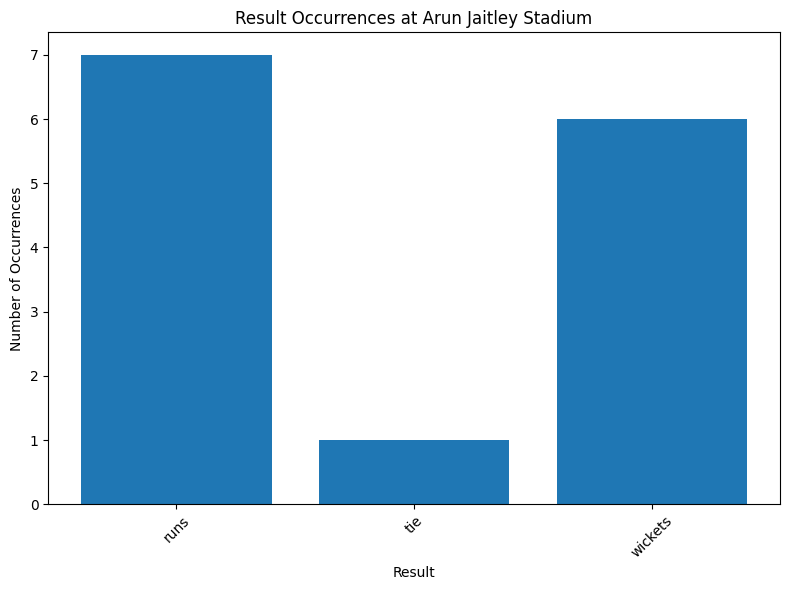

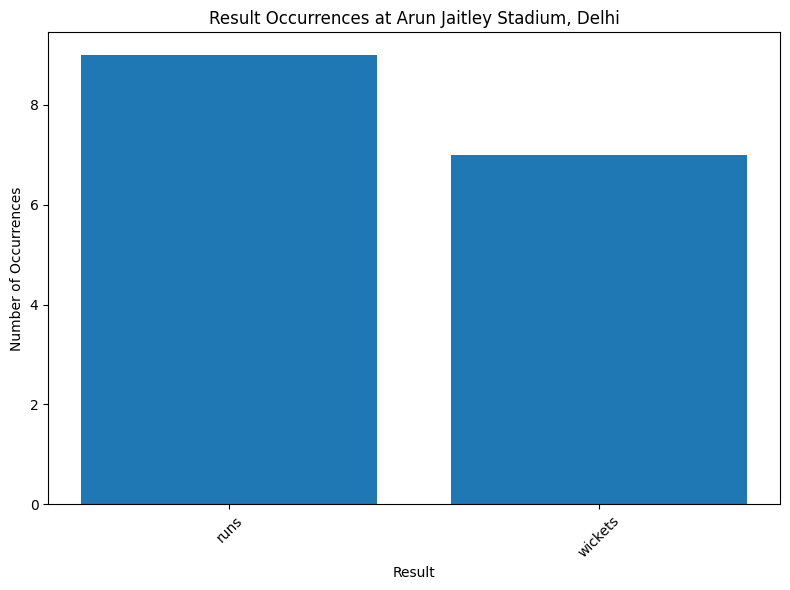

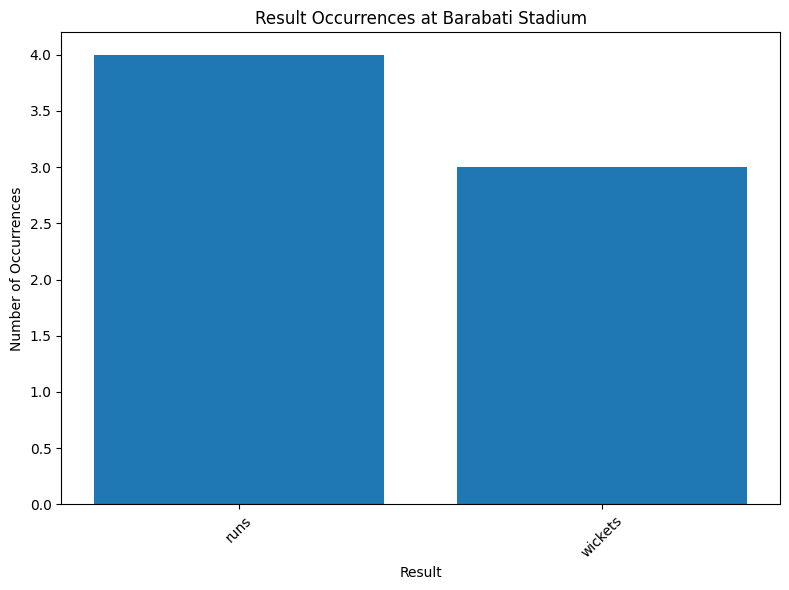

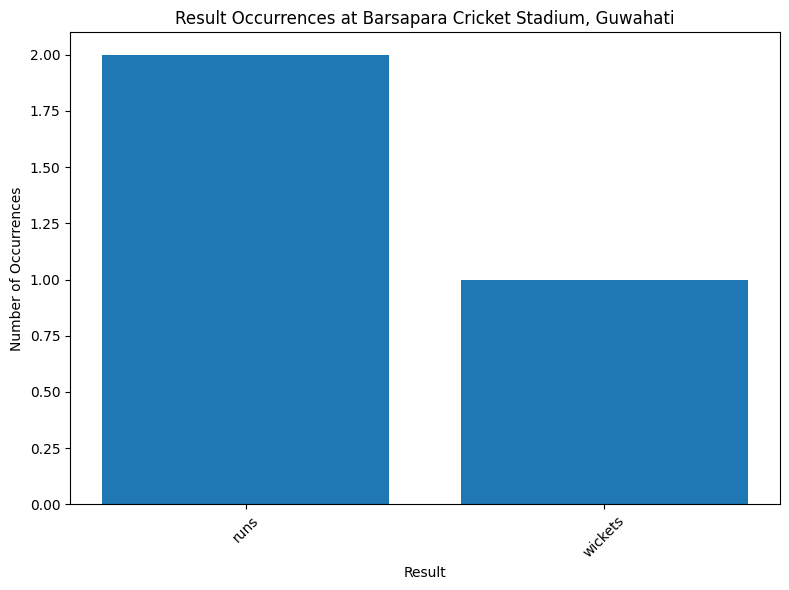

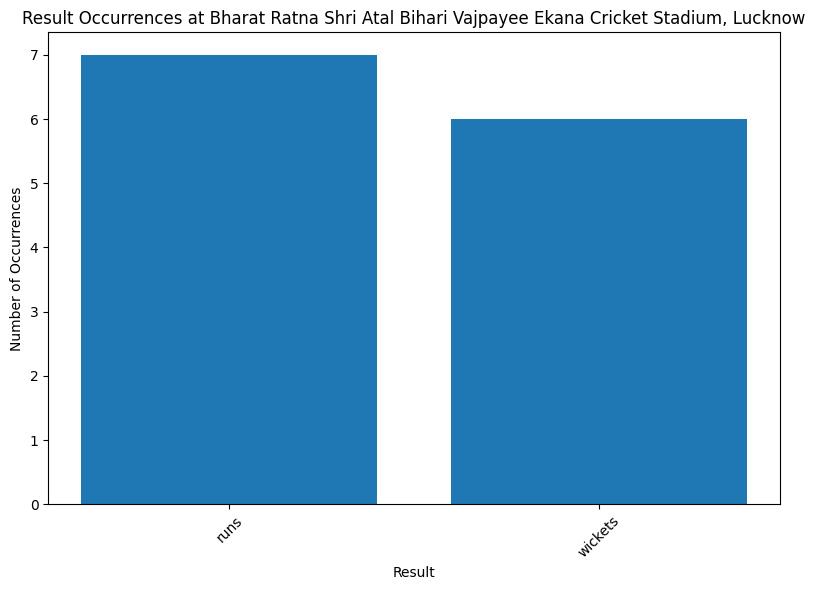

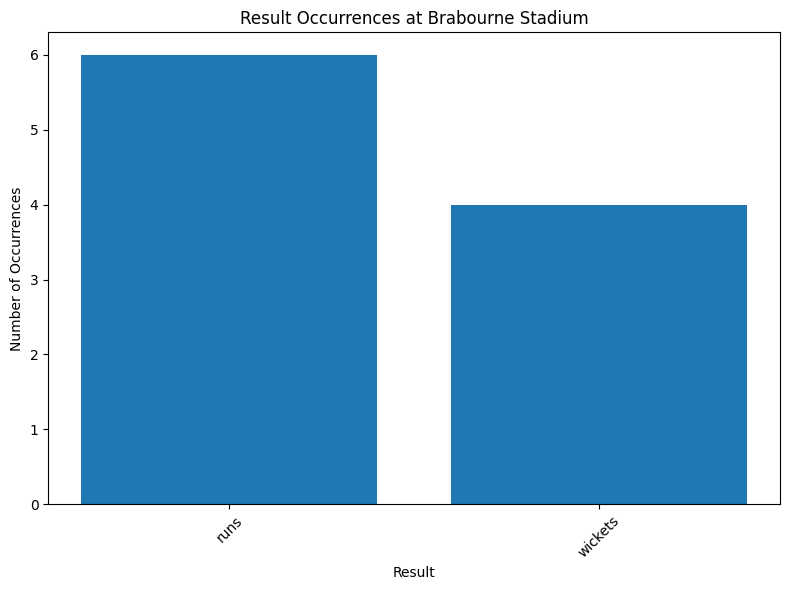

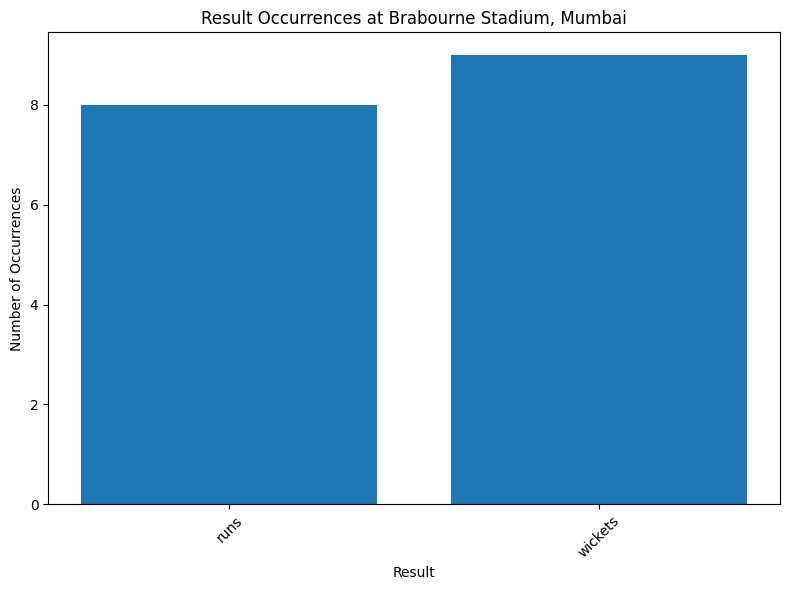

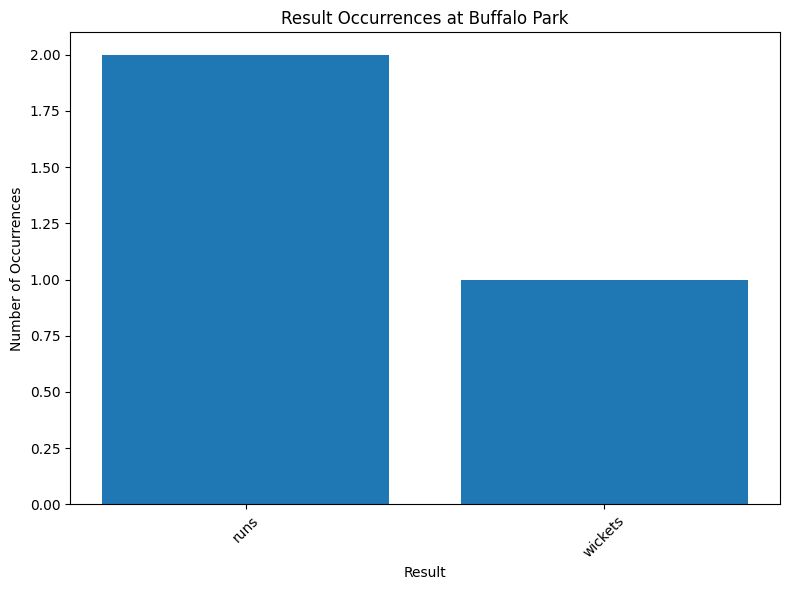

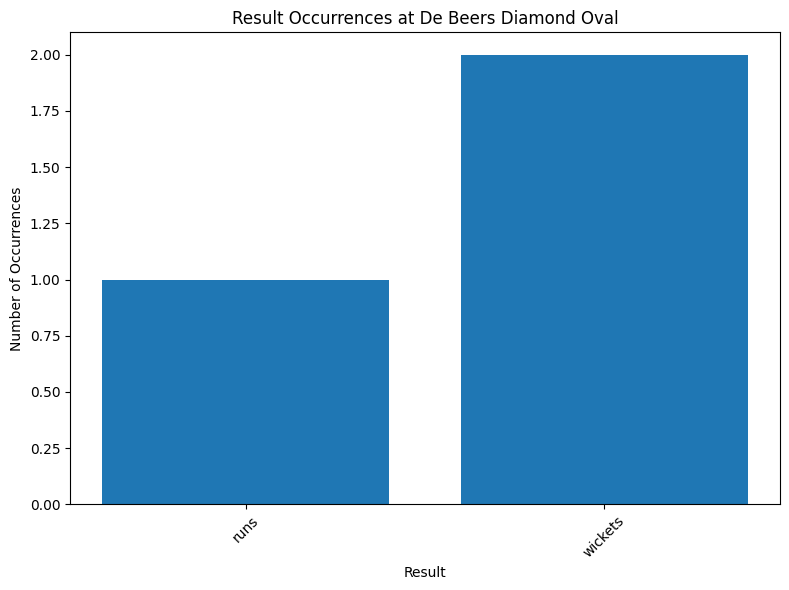

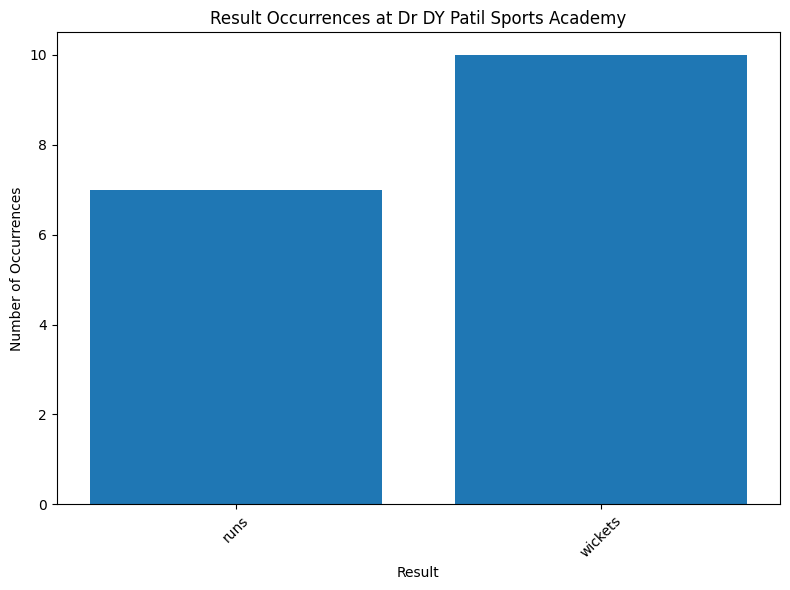

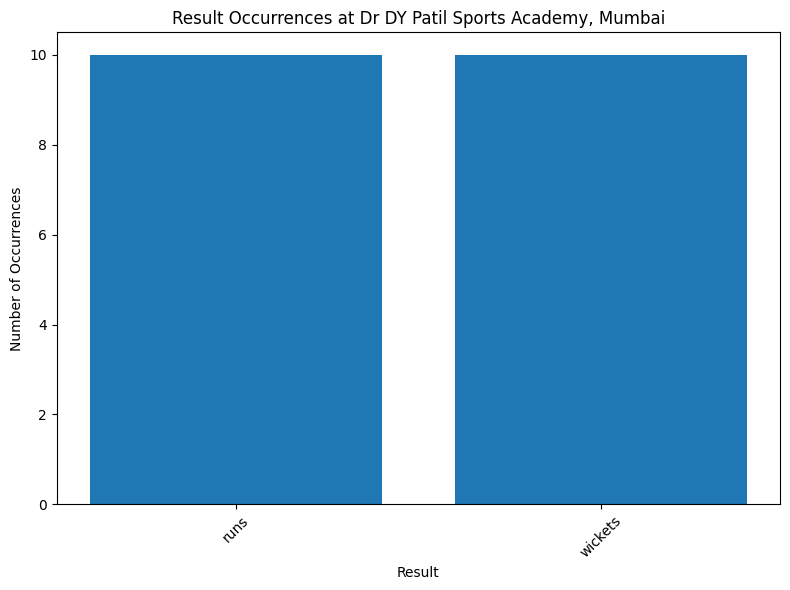

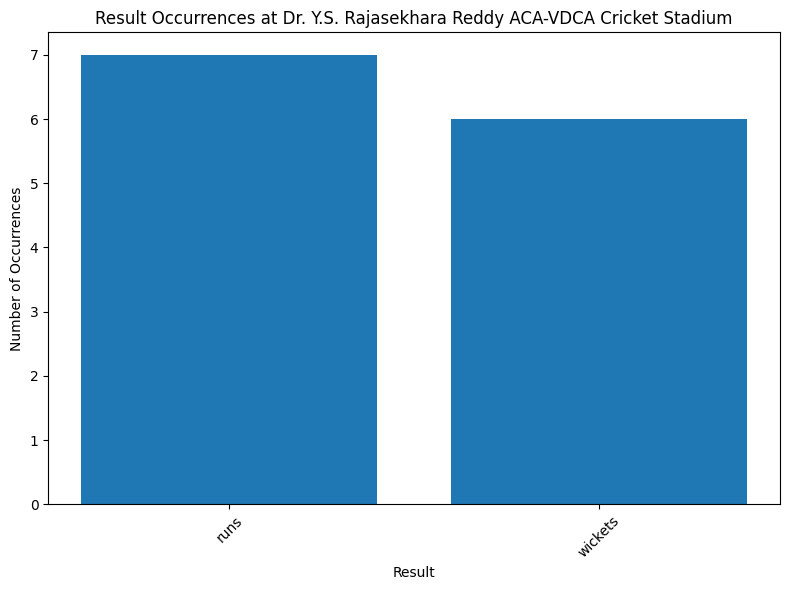

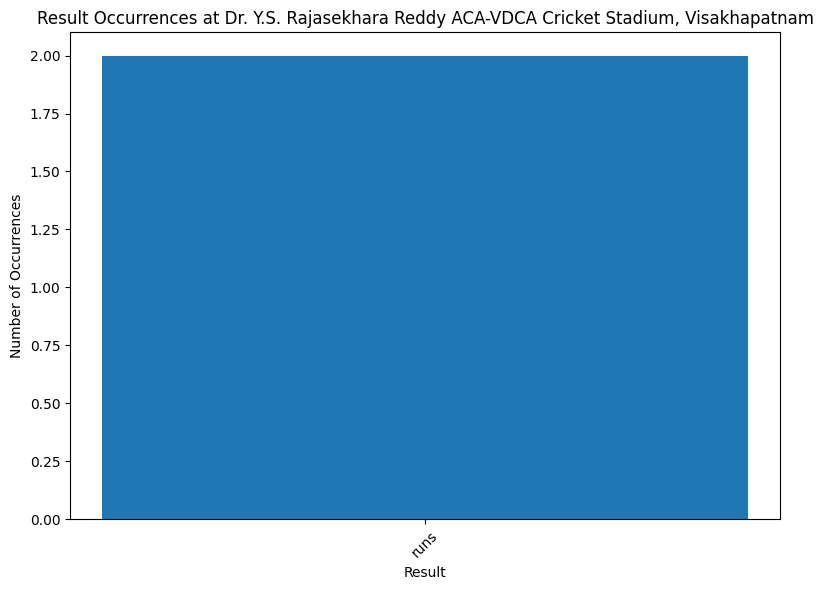

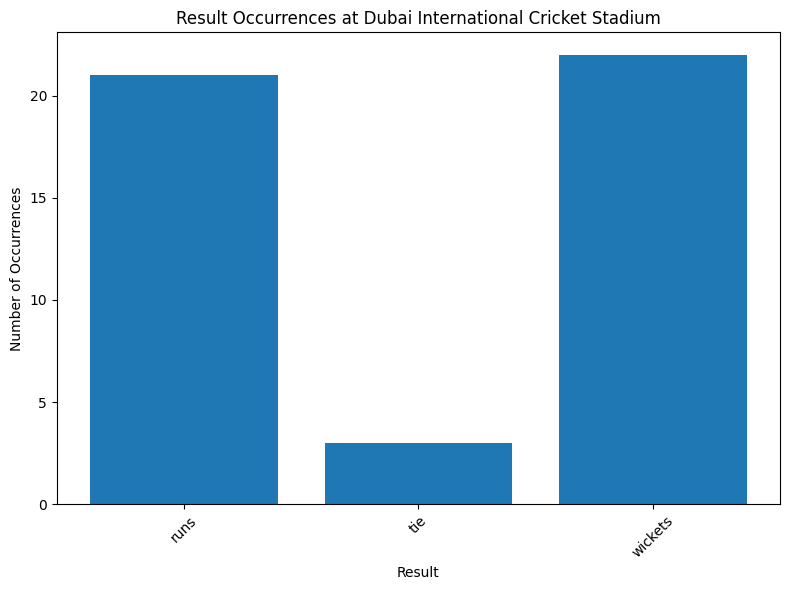

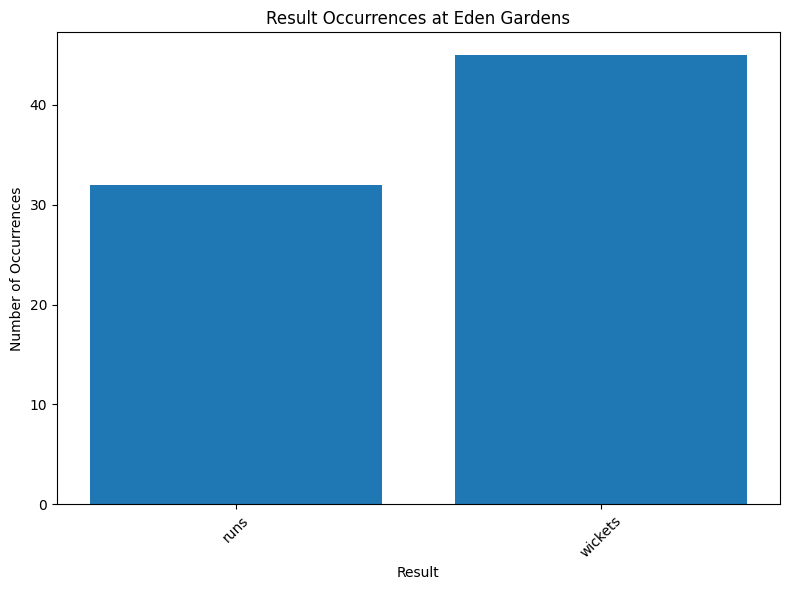

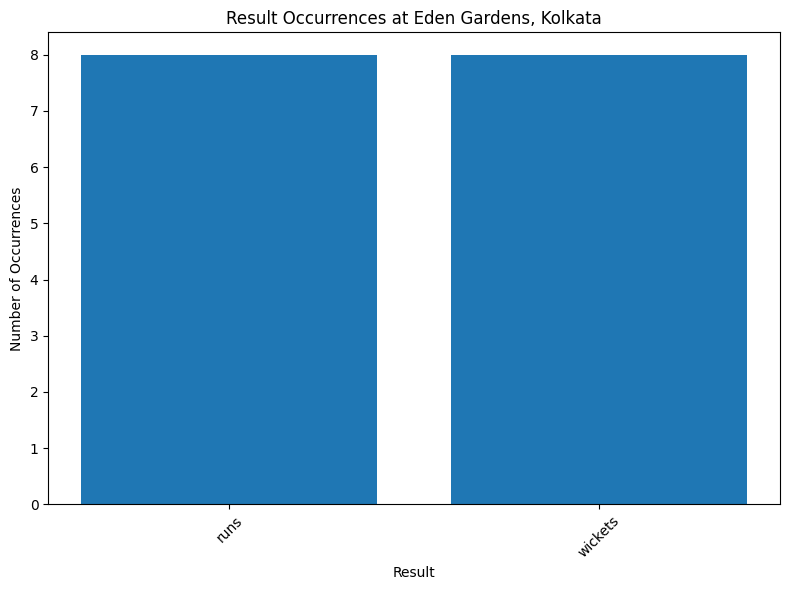

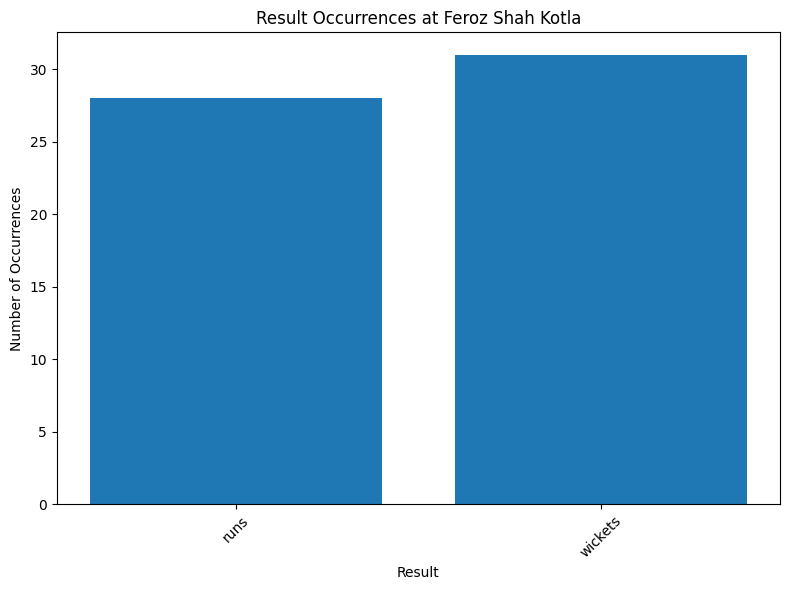

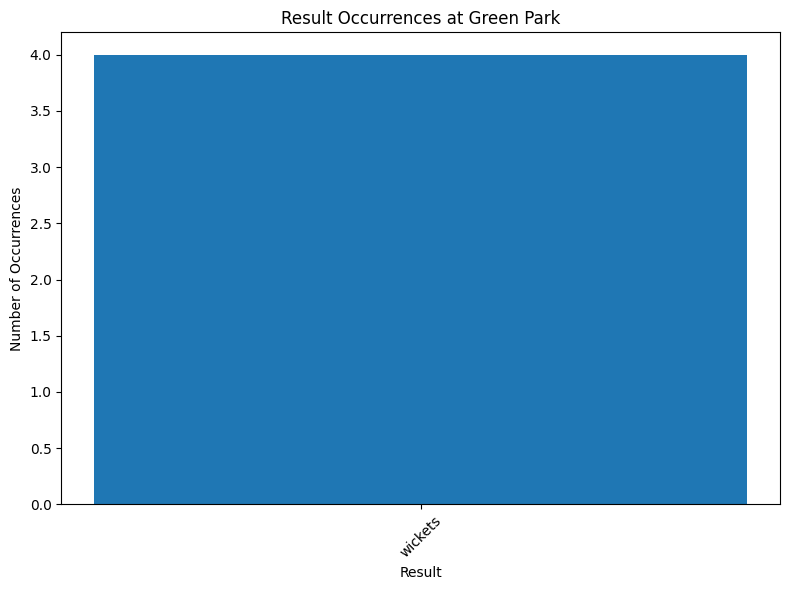

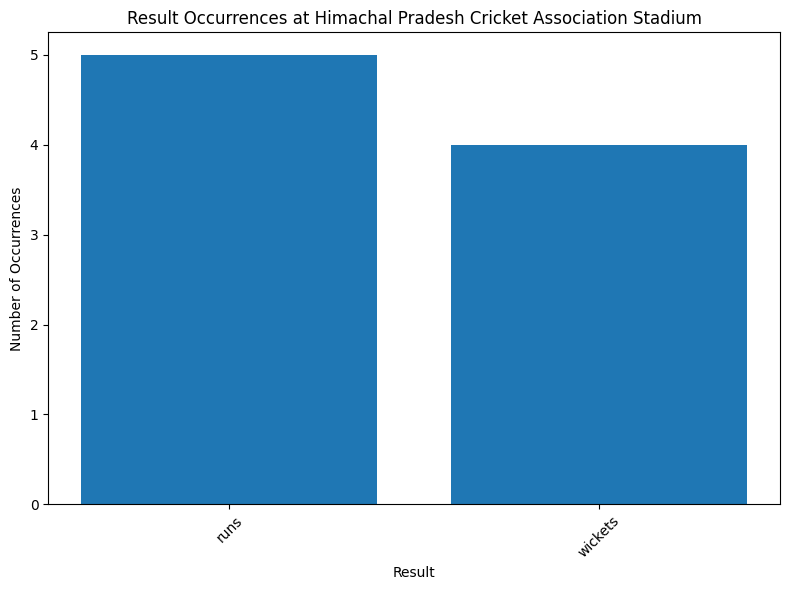

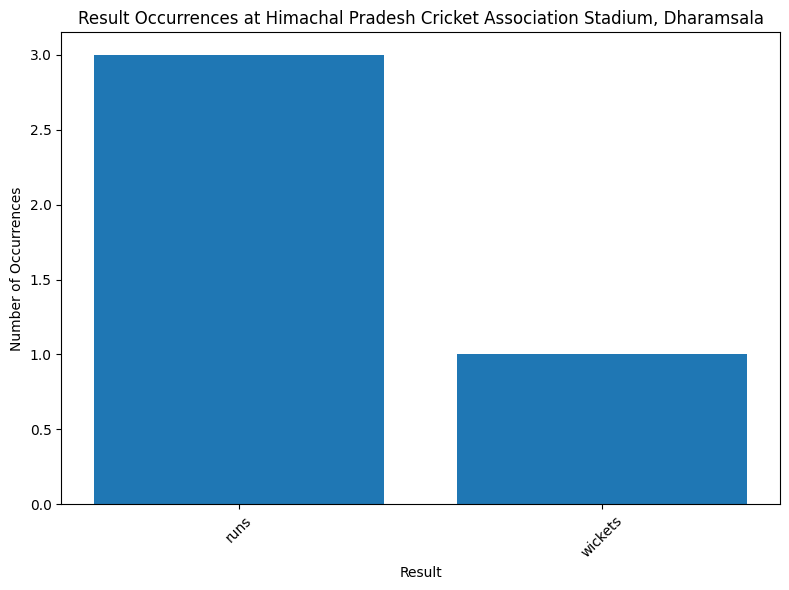

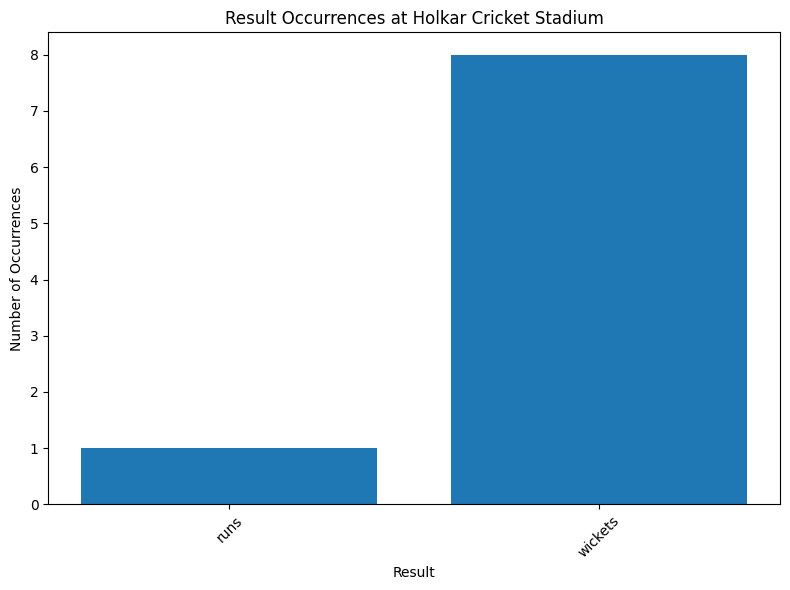

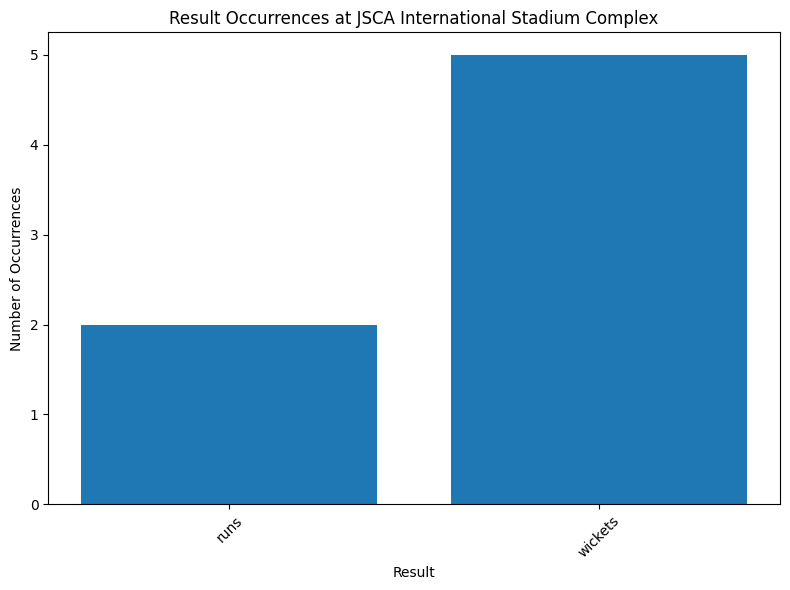

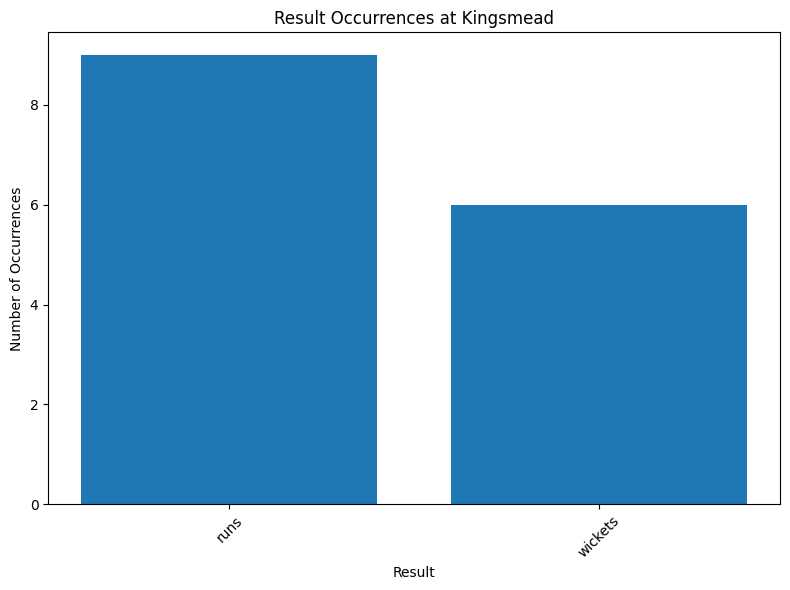

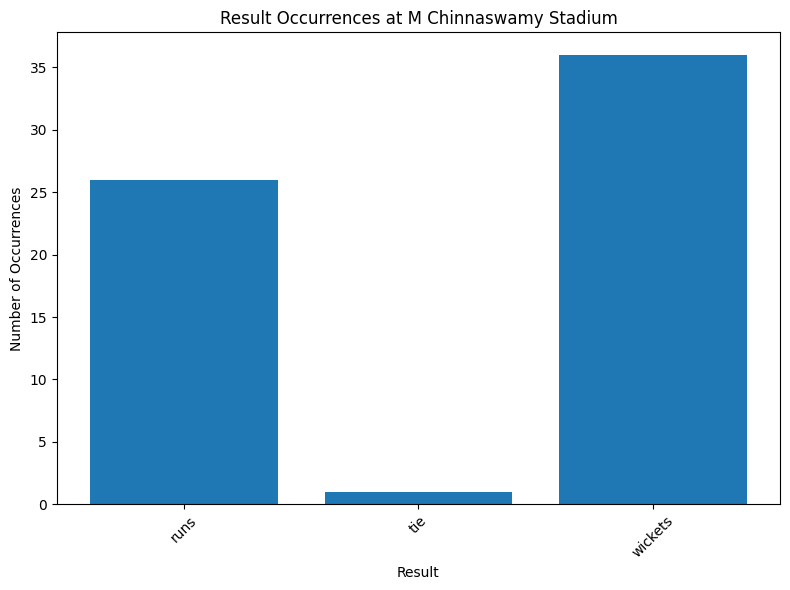

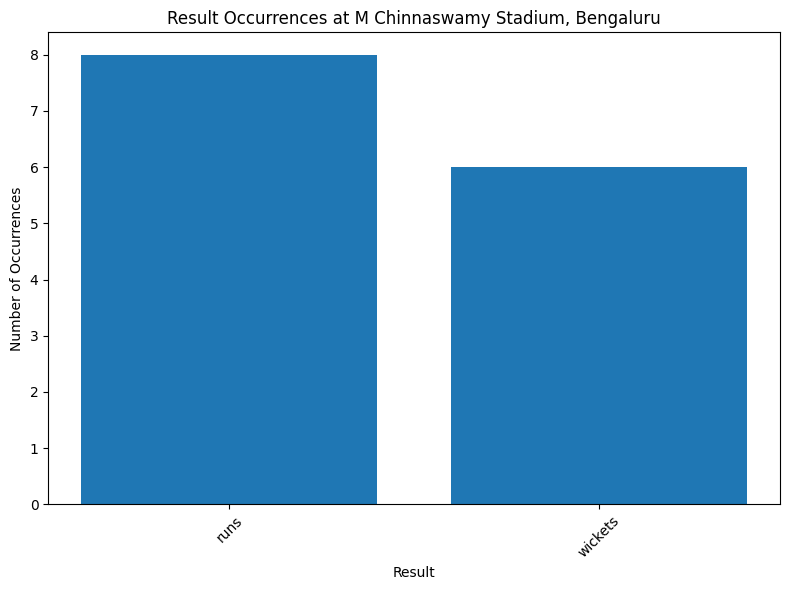

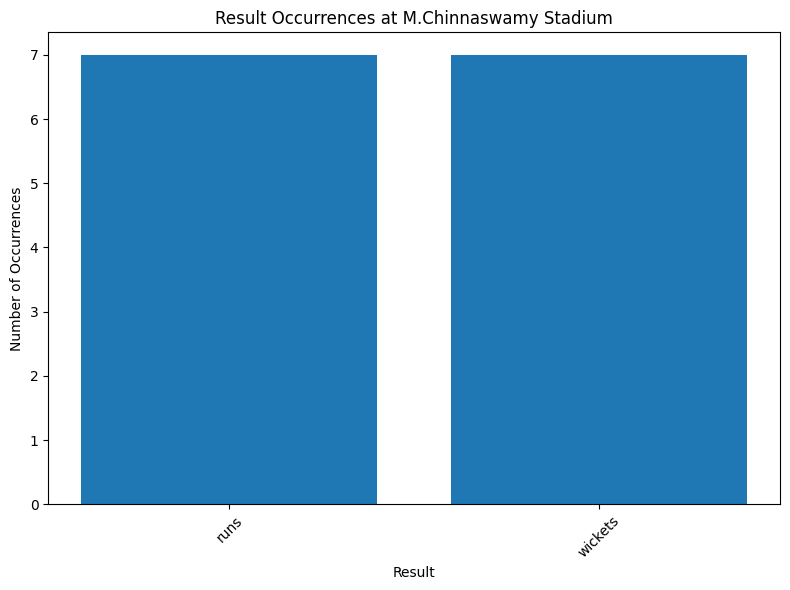

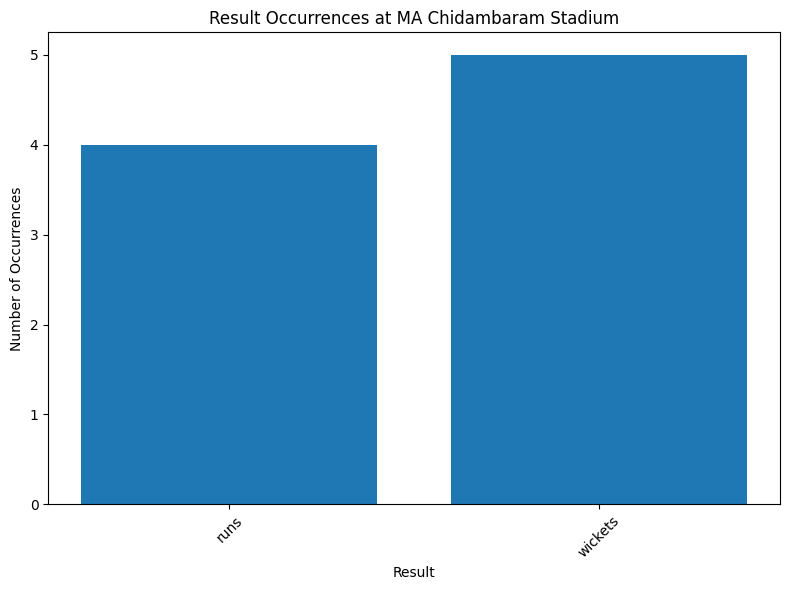

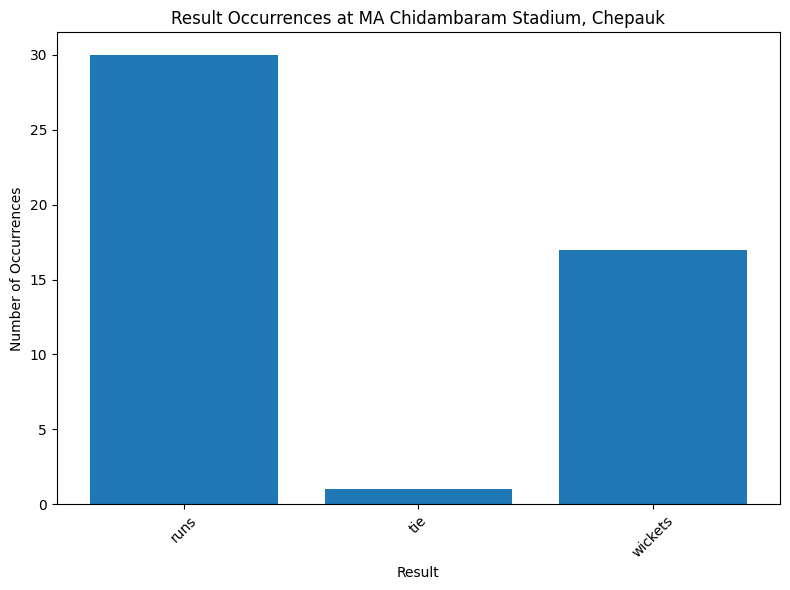

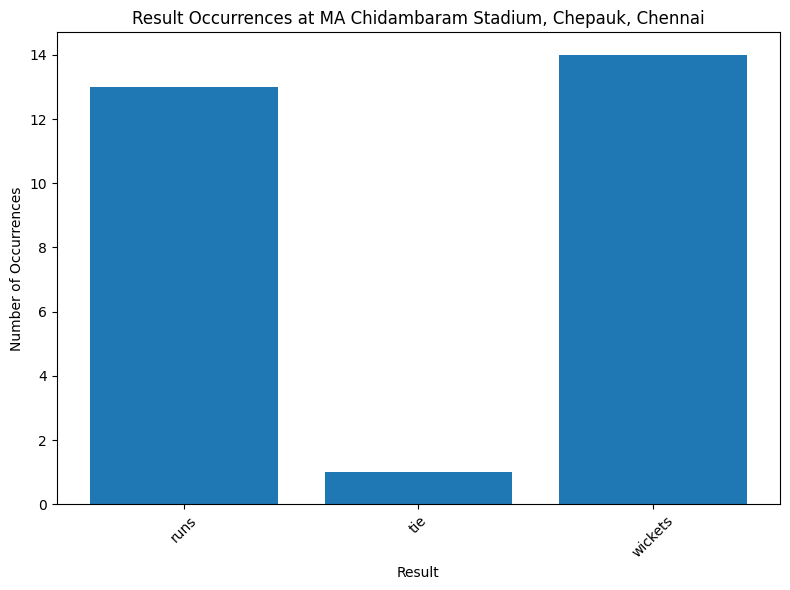

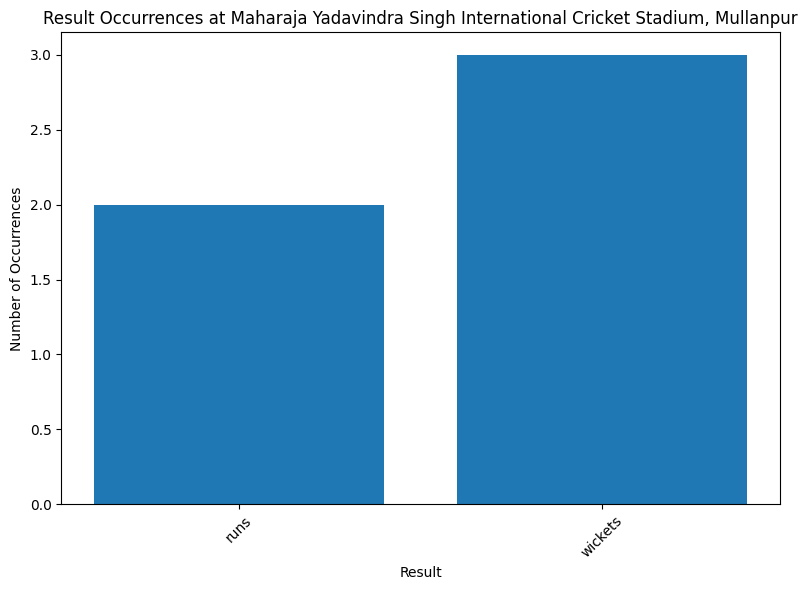

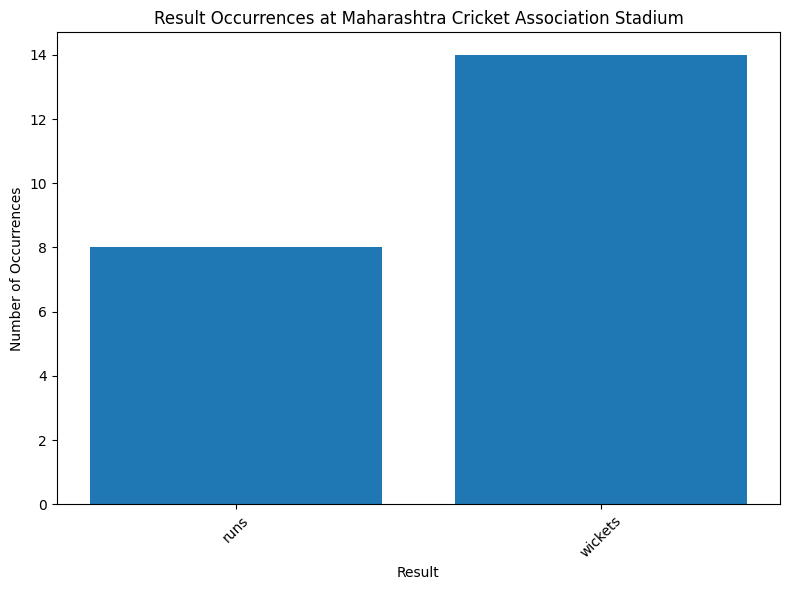

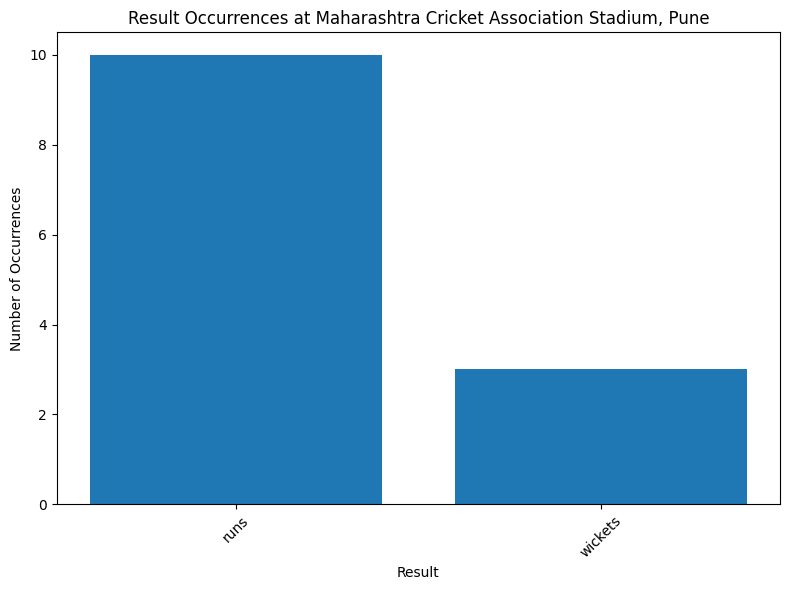

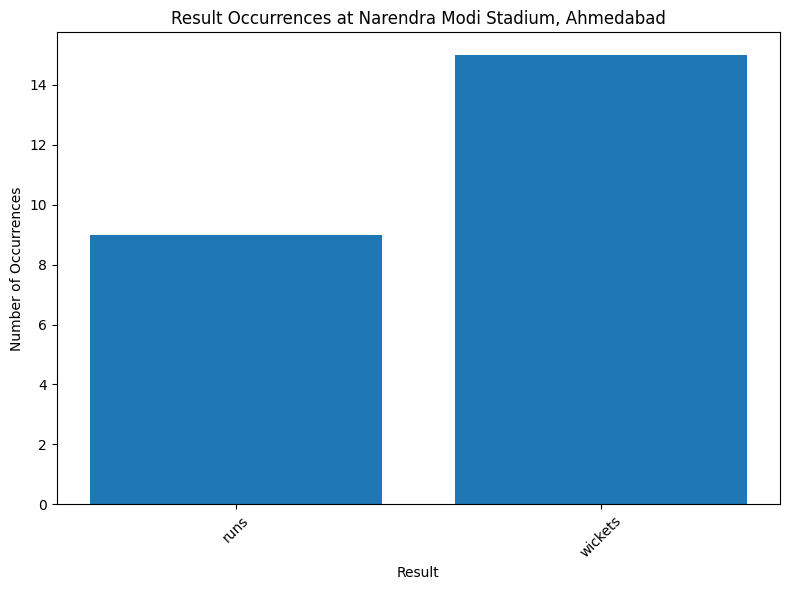

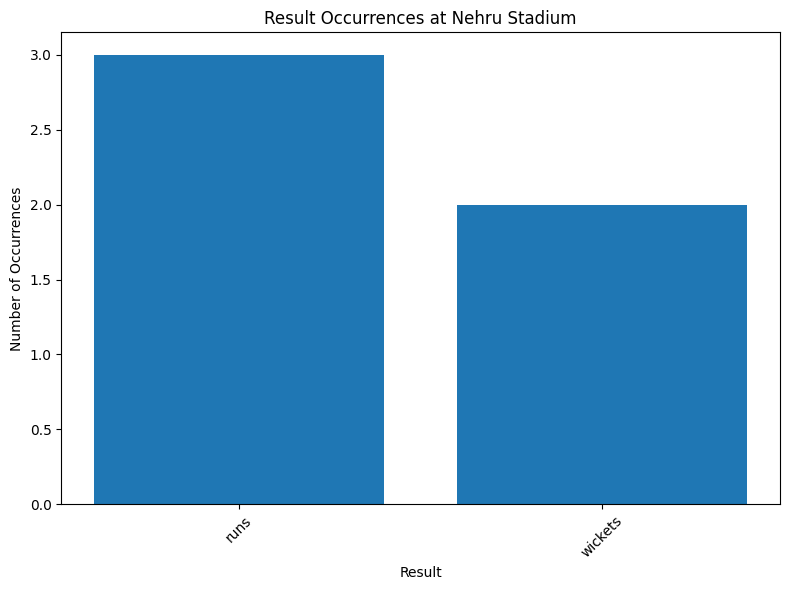

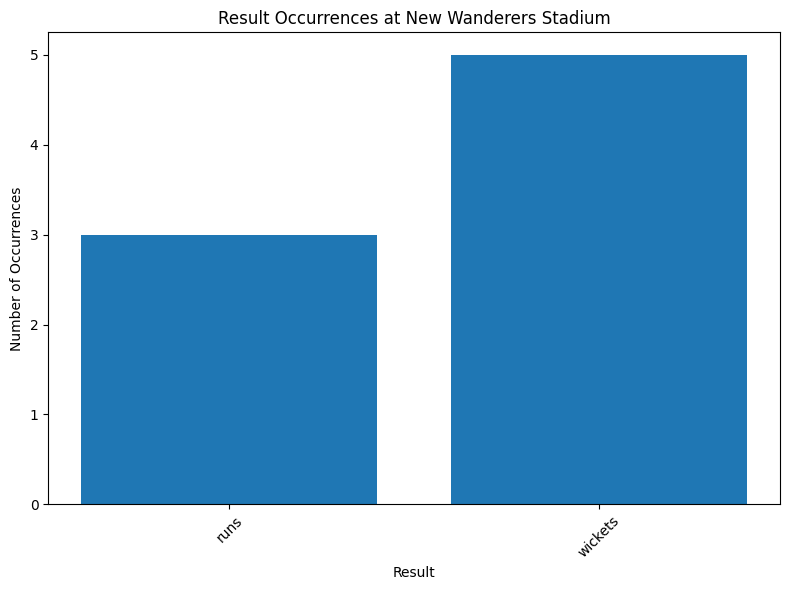

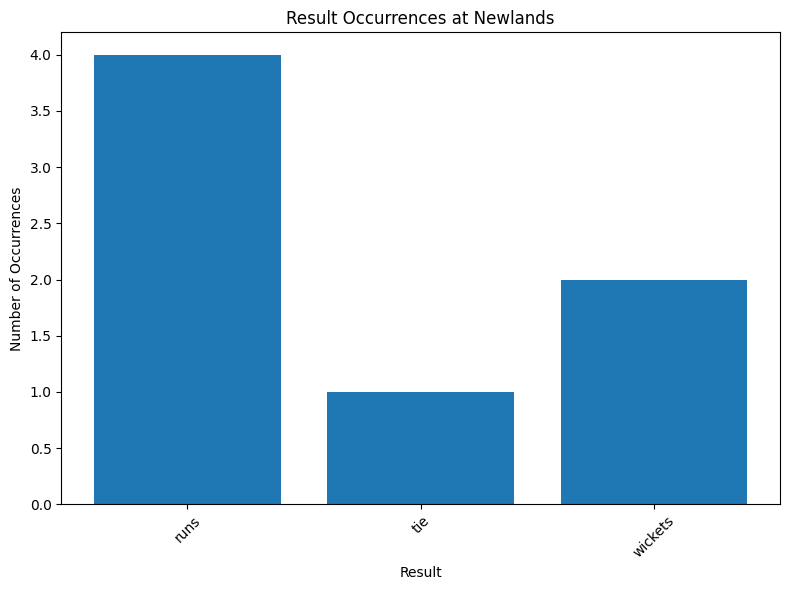

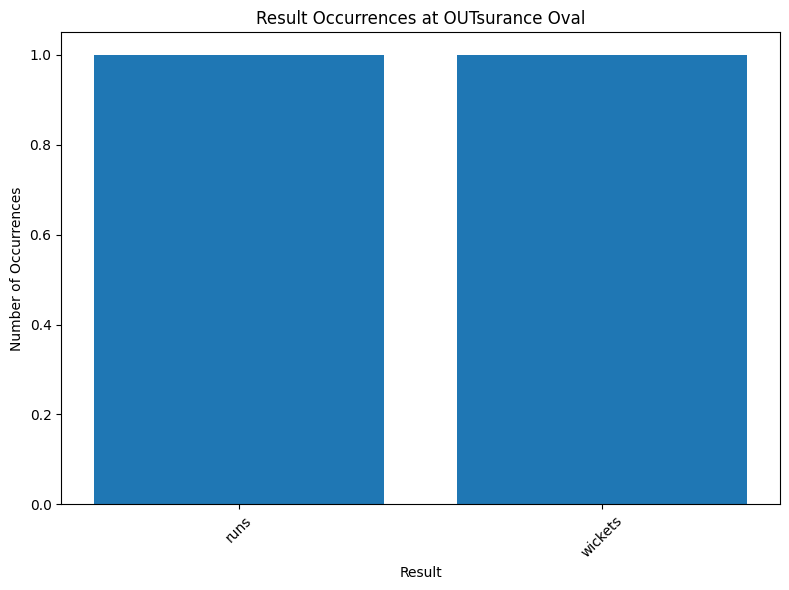

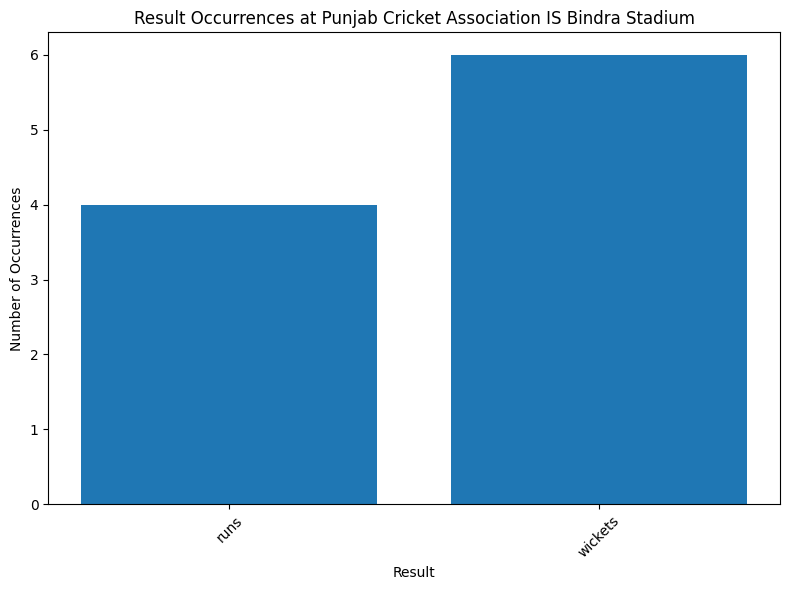

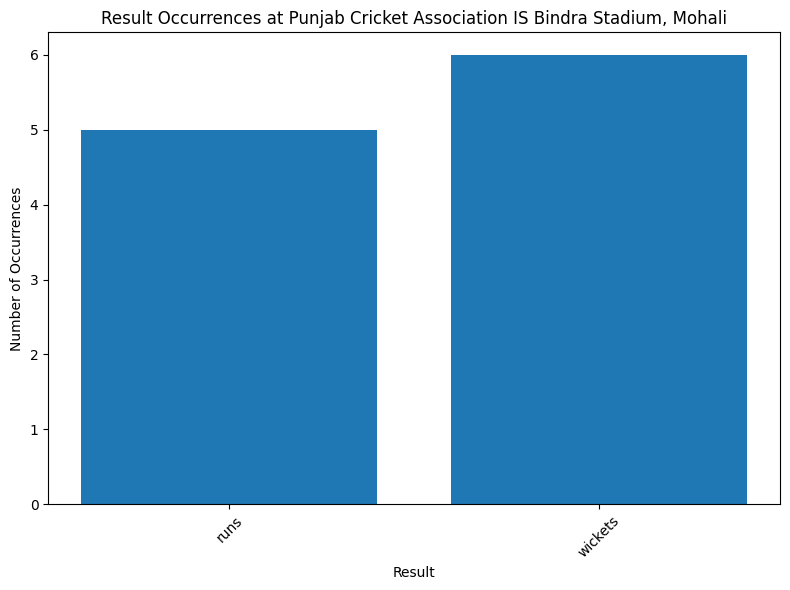

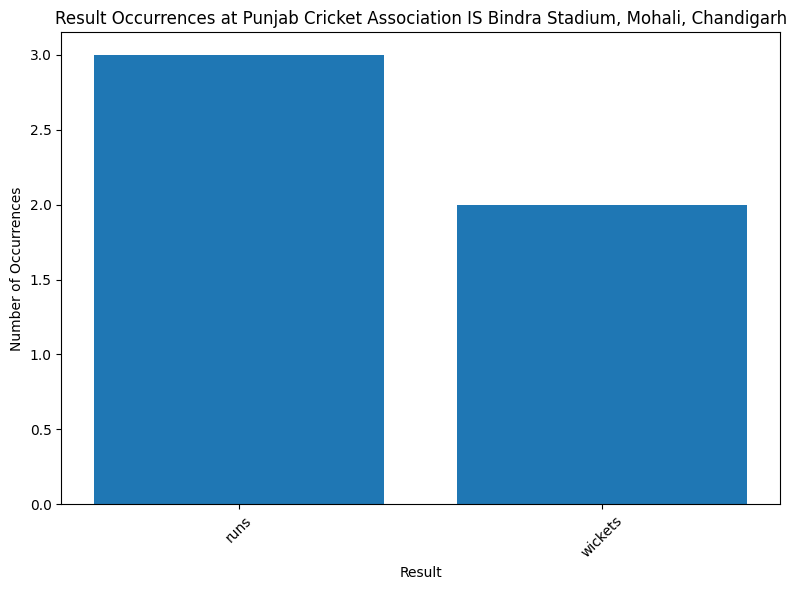

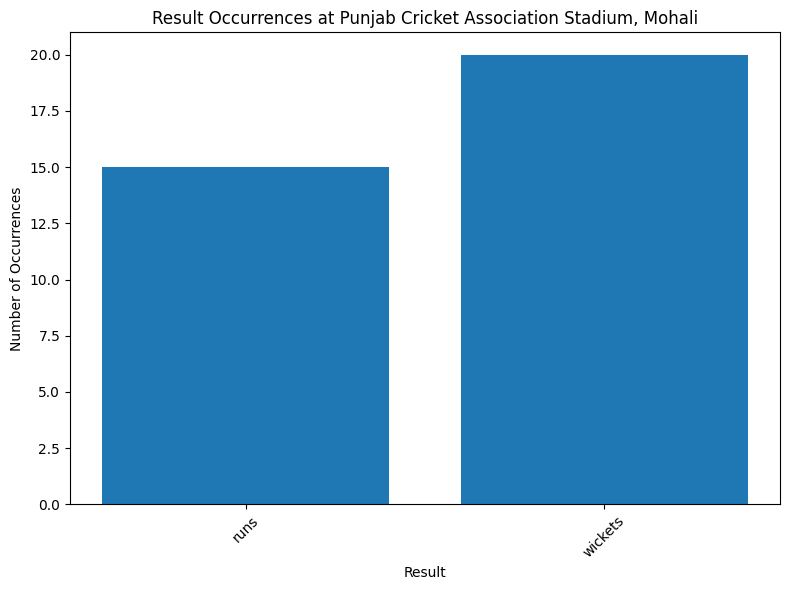

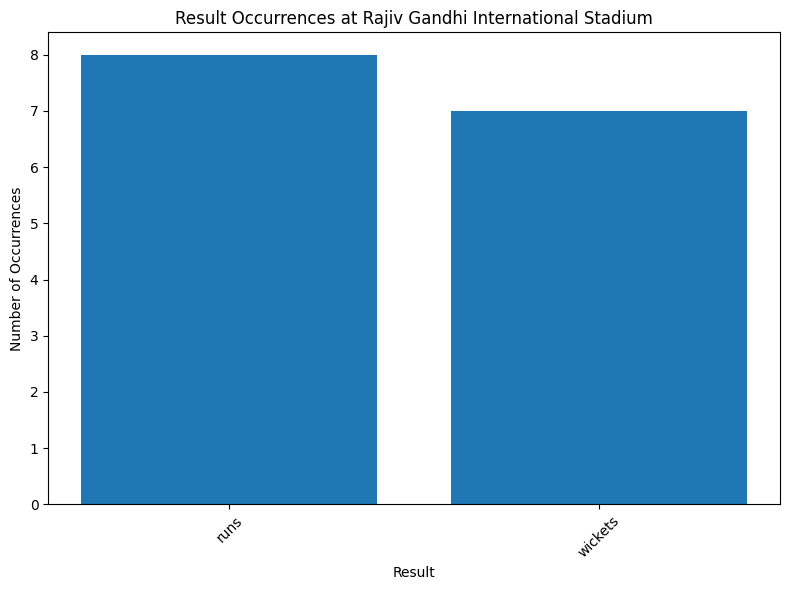

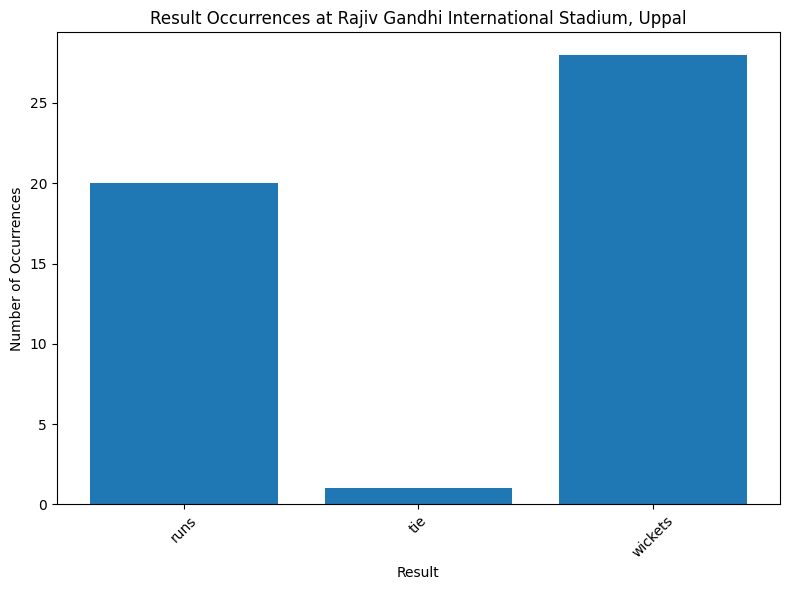

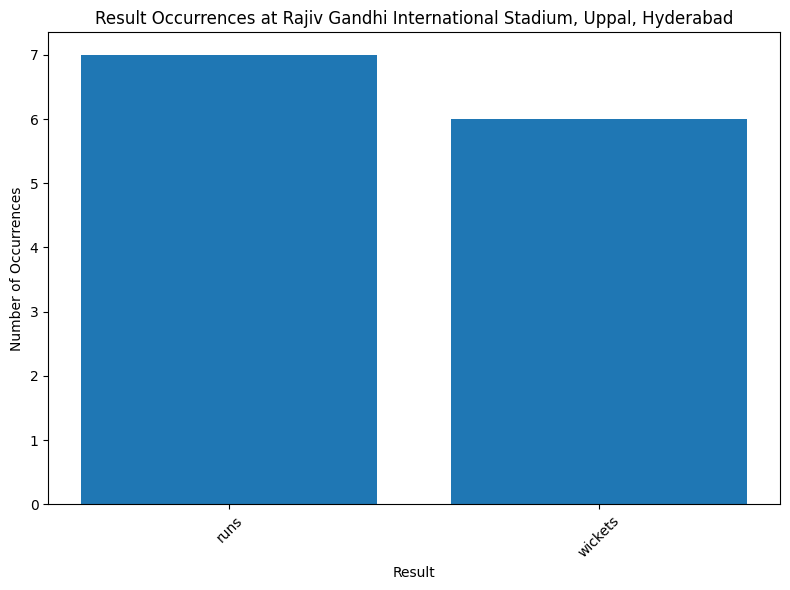

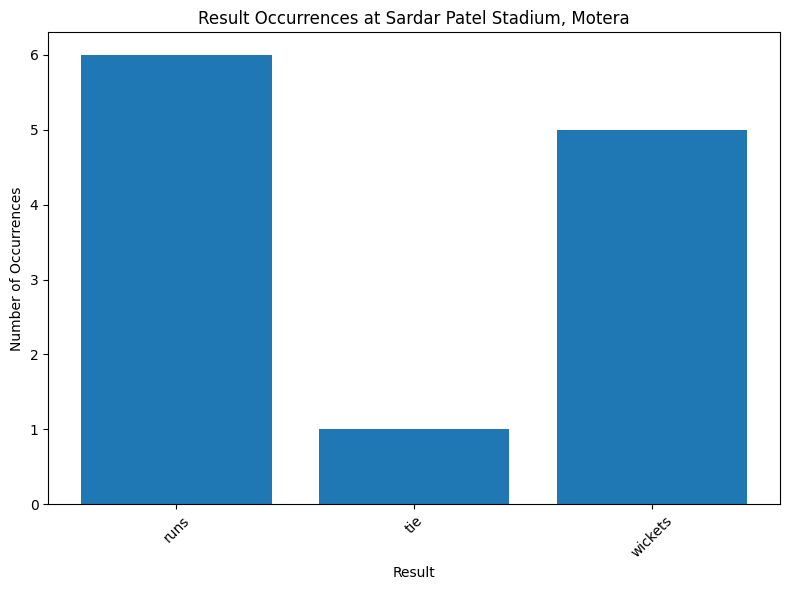

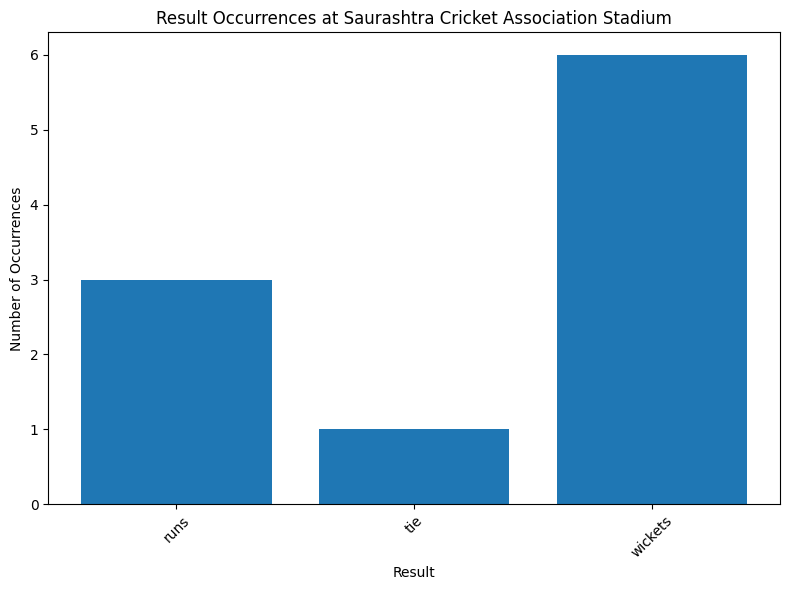

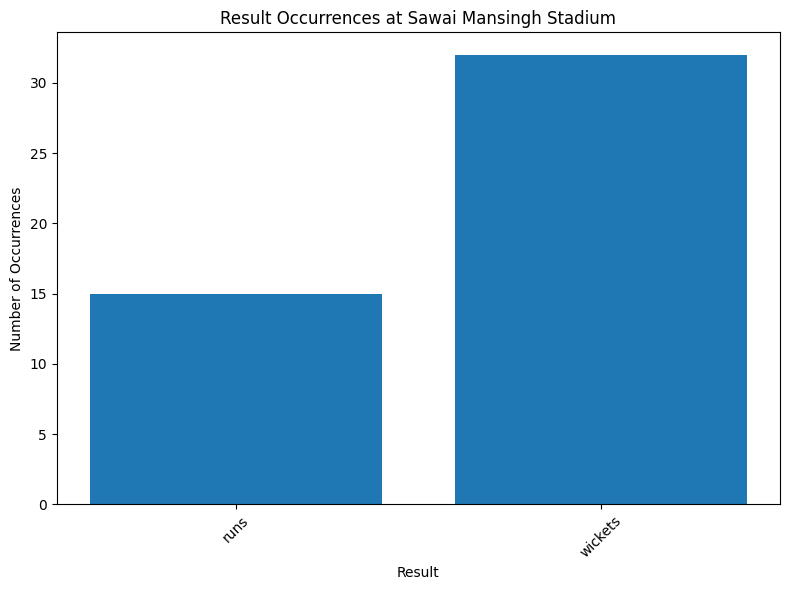

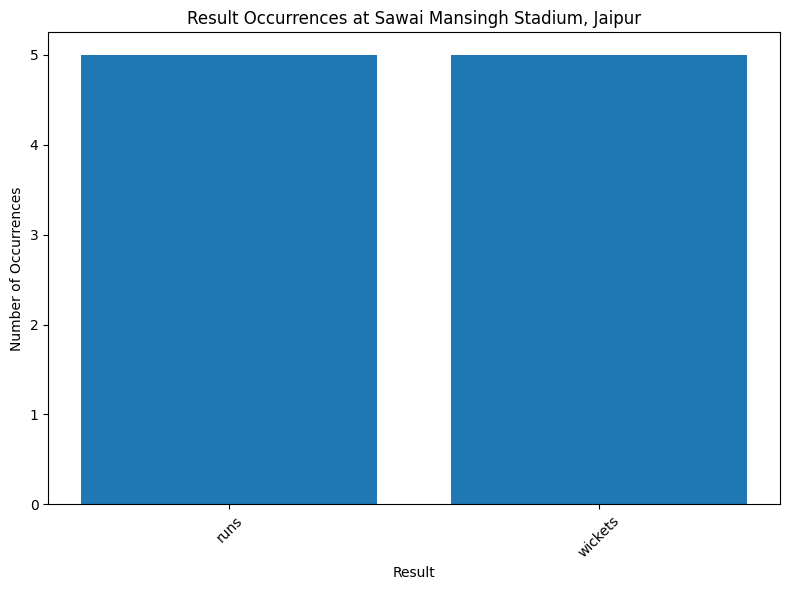

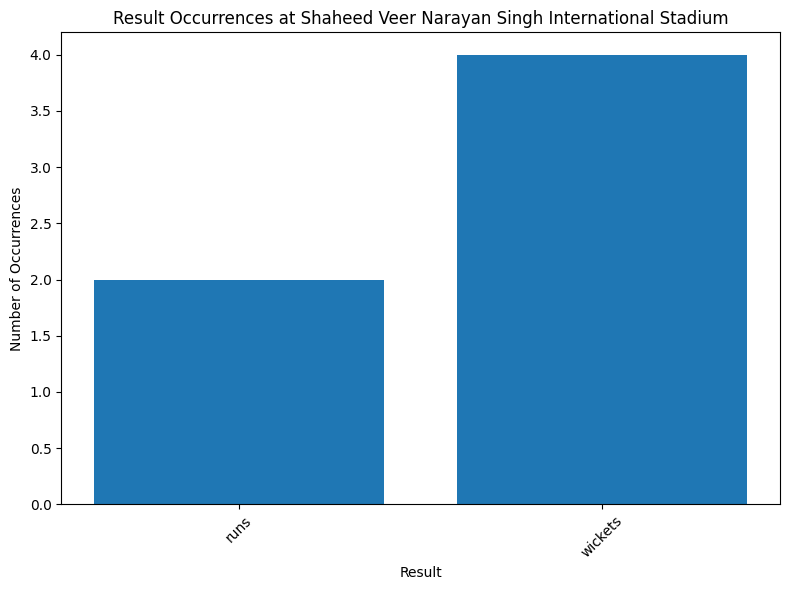

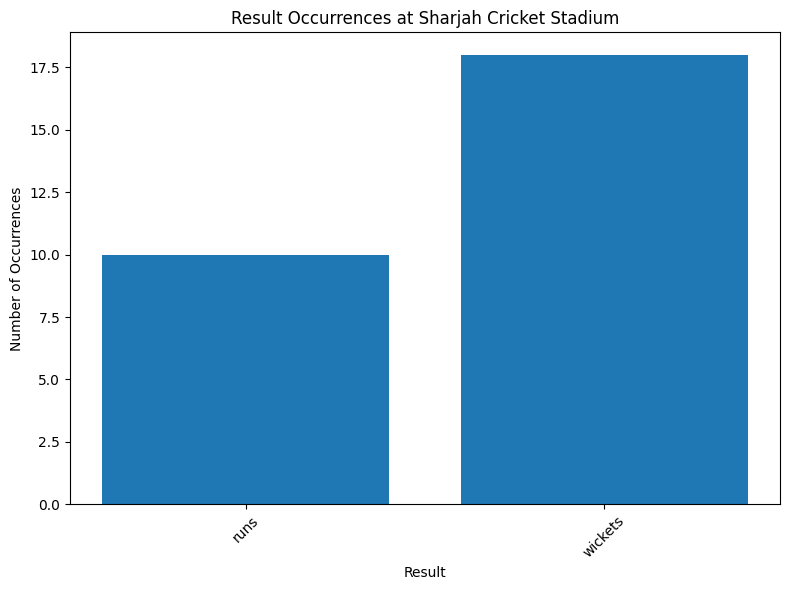

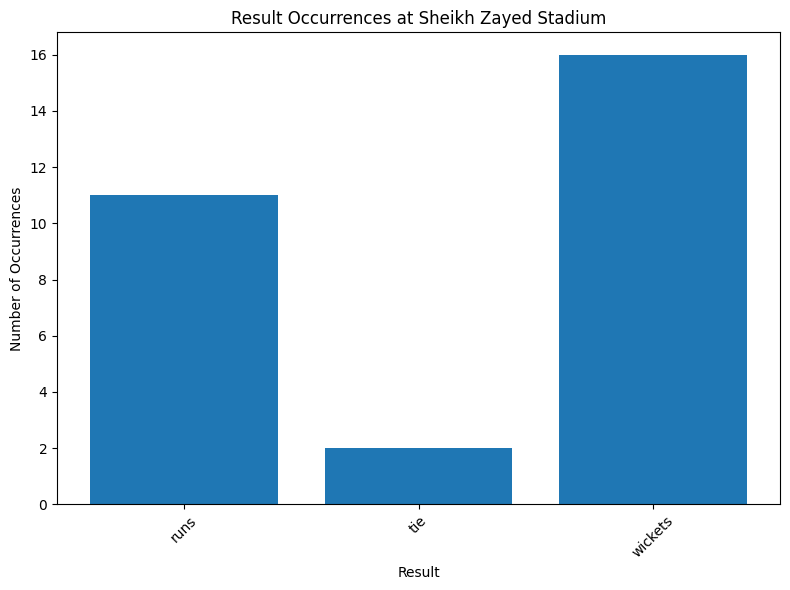

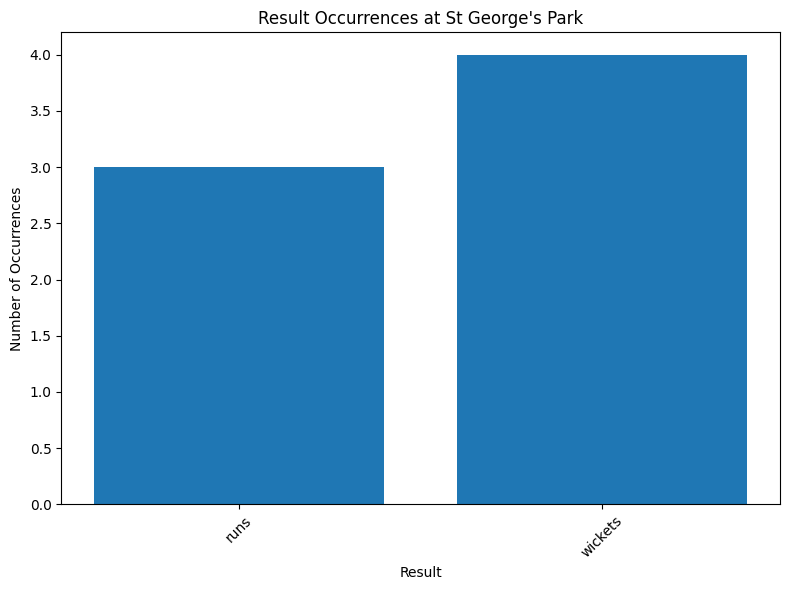

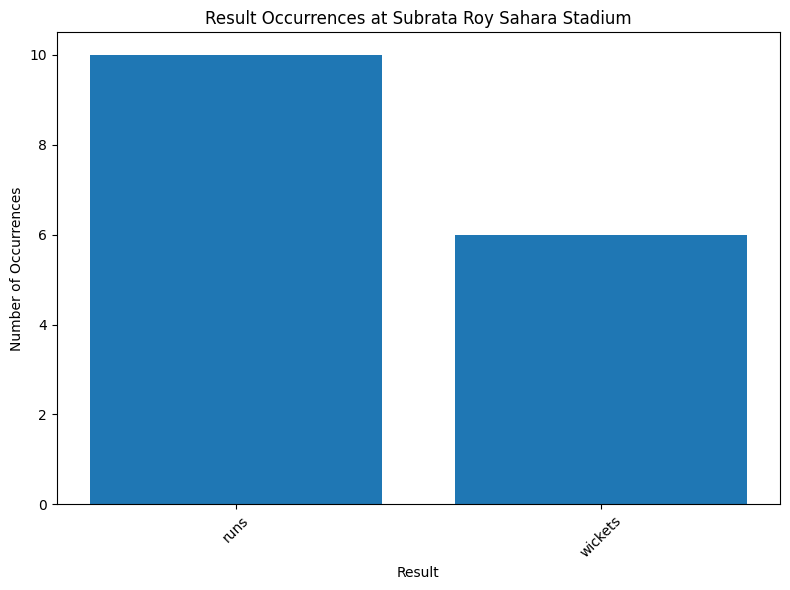

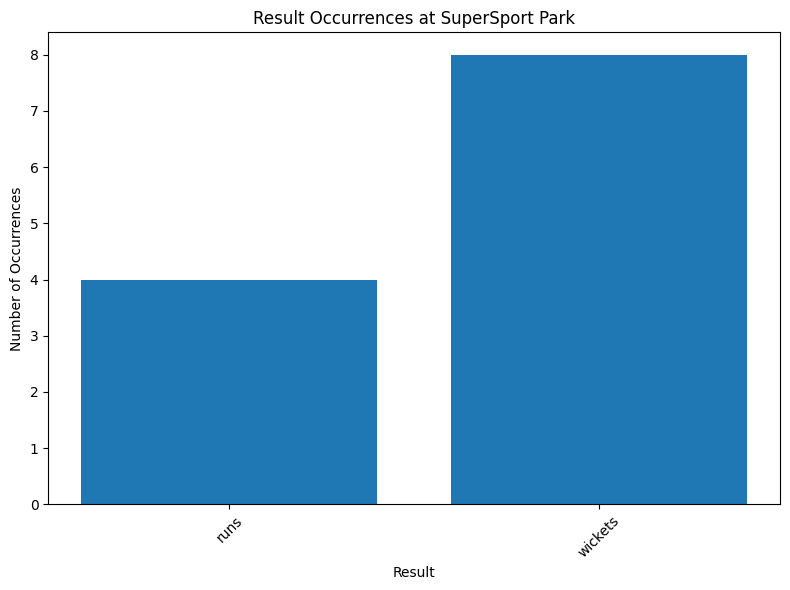

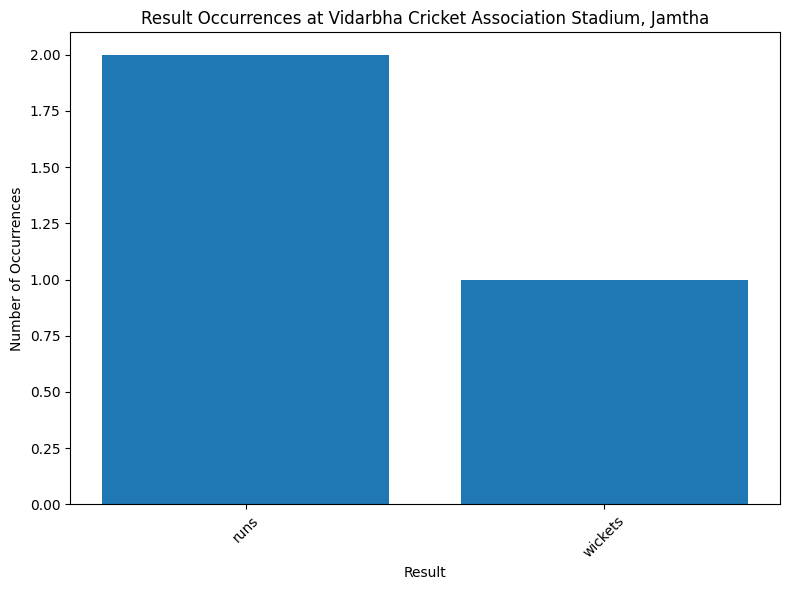

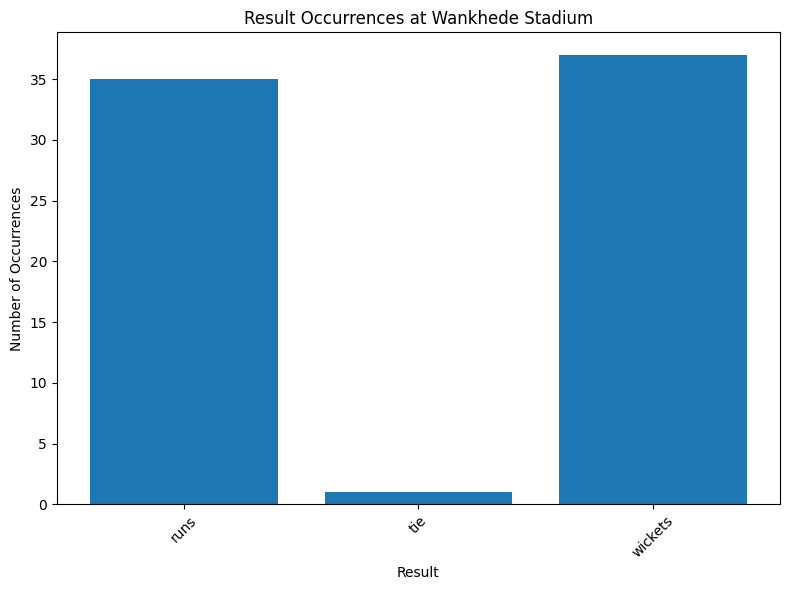

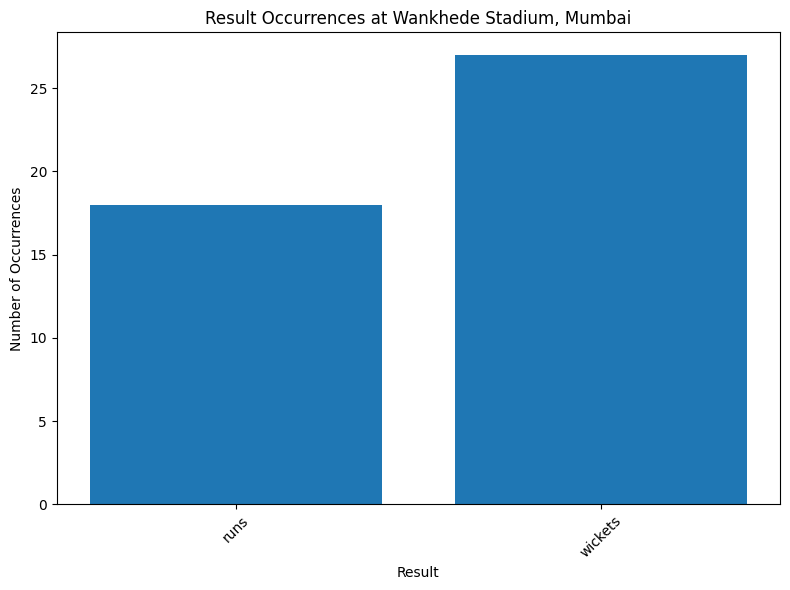

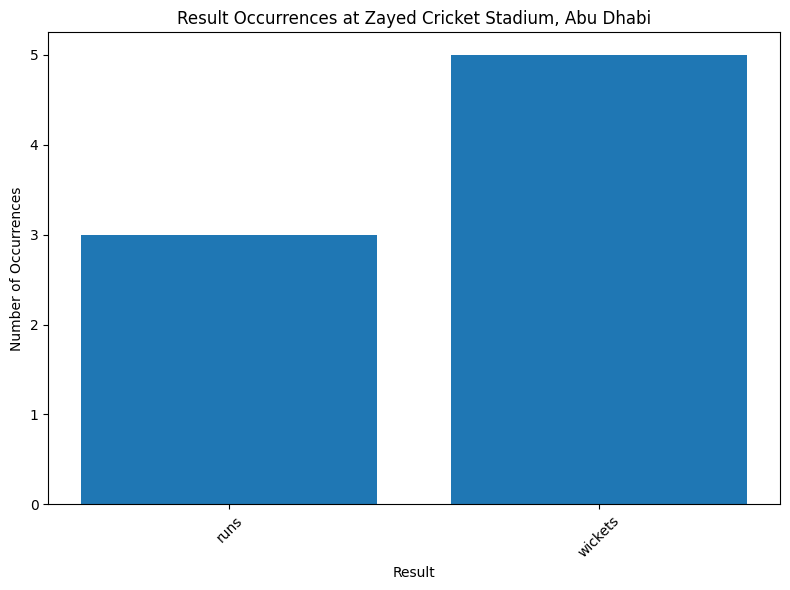

In [19]:
venues = grouped['venue'].unique()  

for venue in venues:
    venue_data = grouped[grouped['venue'] == venue]
    
    plt.figure(figsize=(8, 6))
    plt.bar(venue_data['result'], venue_data['new_result'])
    plt.title(f"Result Occurrences at {venue}")
    plt.xlabel('Result')
    plt.ylabel('Number of Occurrences')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Team anlysis

In [20]:
team_analysis = matches[['winner','result']]
team_analysis = pd.DataFrame(team_analysis)
team_analysis

,winner,result
0,Kolkata Knight Riders,runs
1,Chennai Super Kings,runs
2,Delhi Capitals,wickets
3,Royal Challengers Bangalore,wickets
4,Kolkata Knight Riders,wickets
...,...,...
1090,Sunrisers Hyderabad,wickets
1091,Kolkata Knight Riders,wickets
1092,Rajasthan Royals,wickets
1093,Sunrisers Hyderabad,runs


In [21]:
grouped_team = team_analysis.groupby(['winner', 'result']).size().reset_index(name='new_result')
grouped_team

,winner,result,new_result
0,Chennai Super Kings,runs,71
1,Chennai Super Kings,wickets,67
2,Delhi Capitals,runs,46
3,Delhi Capitals,tie,3
4,Delhi Capitals,wickets,66
5,Gujarat Titans,runs,12
6,Gujarat Titans,wickets,29
7,Kochi Tuskers Kerala,runs,2
8,Kochi Tuskers Kerala,wickets,4
9,Kolkata Knight Riders,runs,54


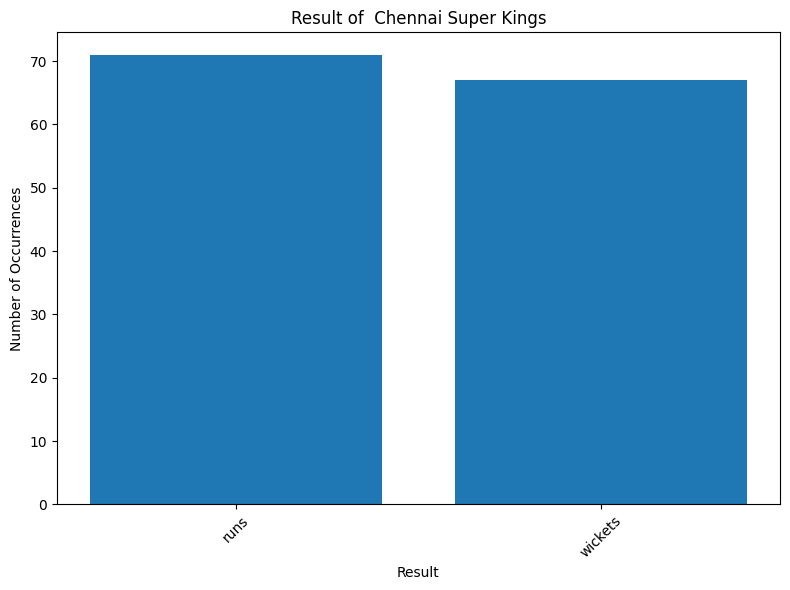

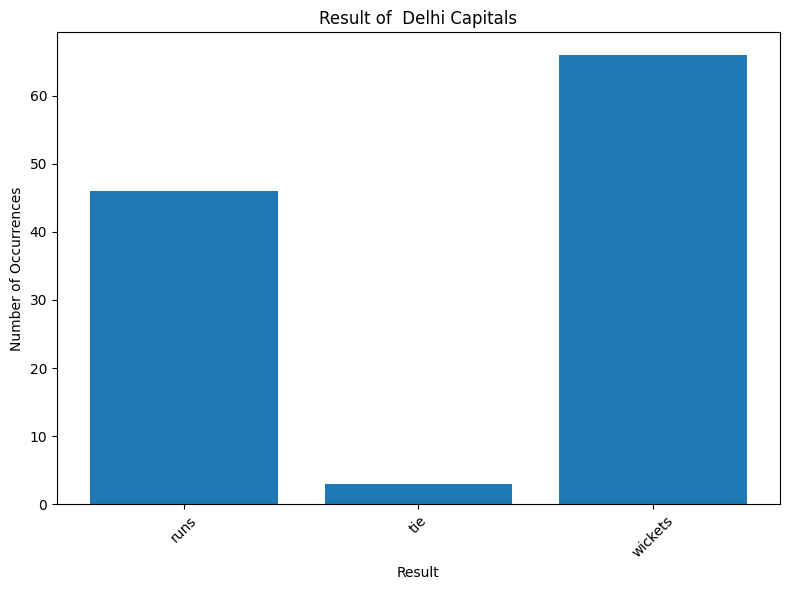

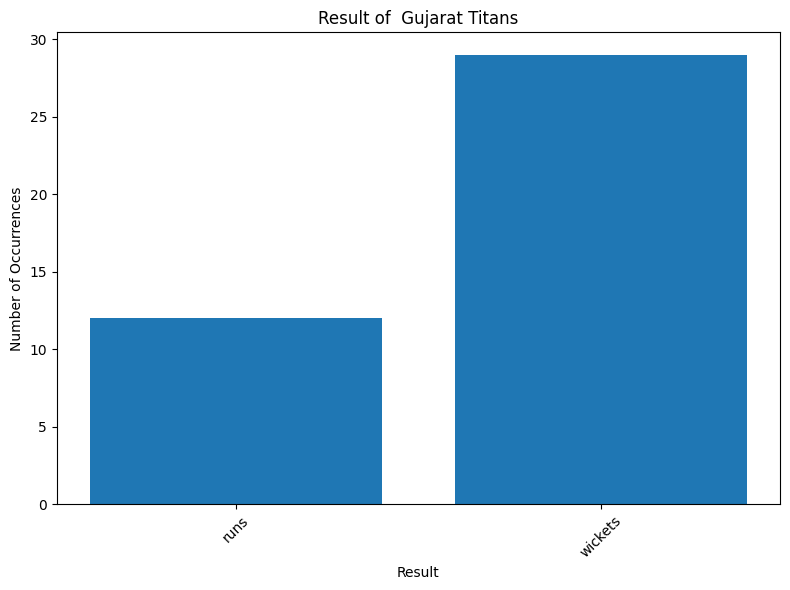

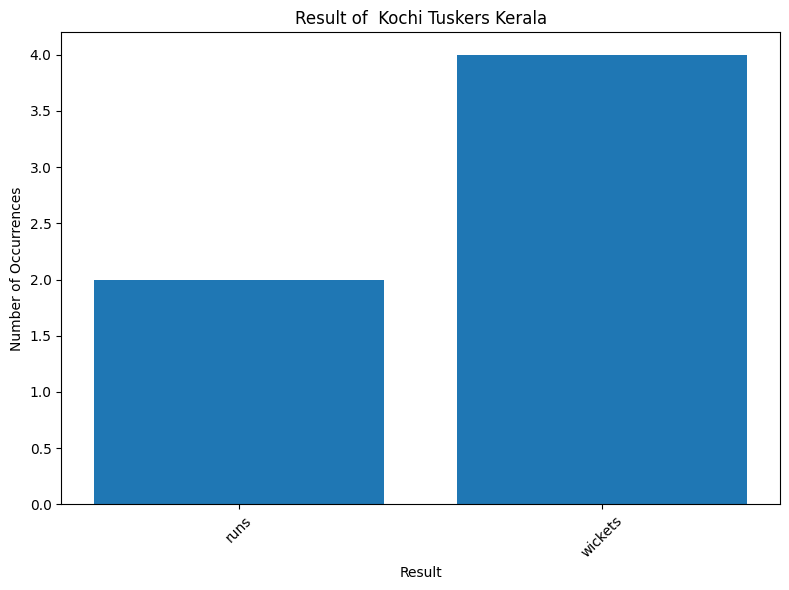

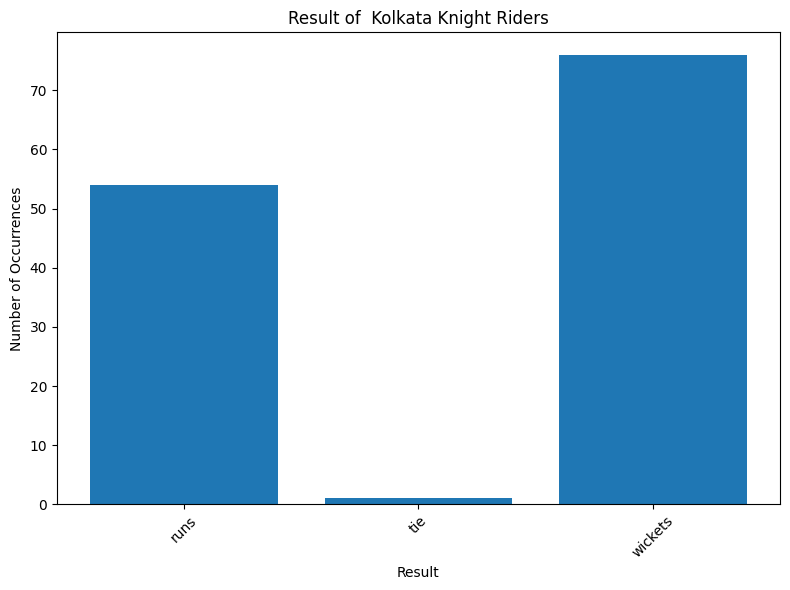

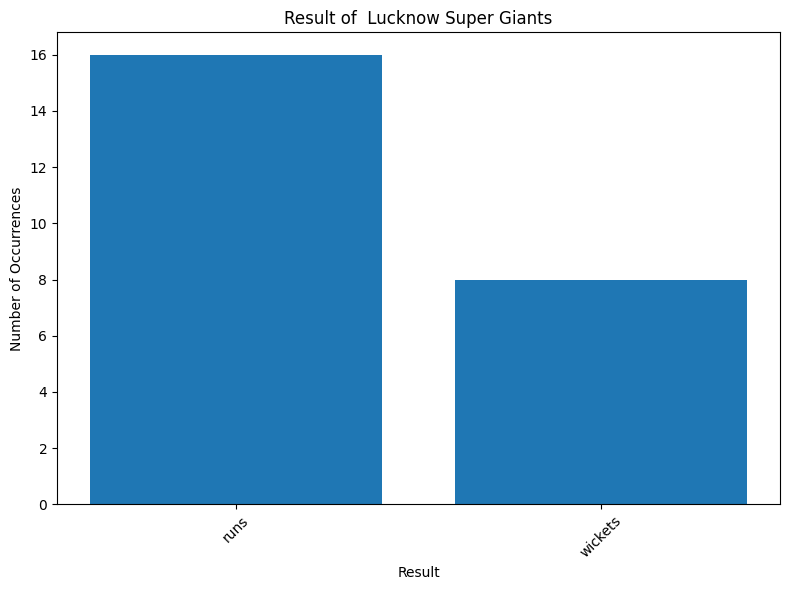

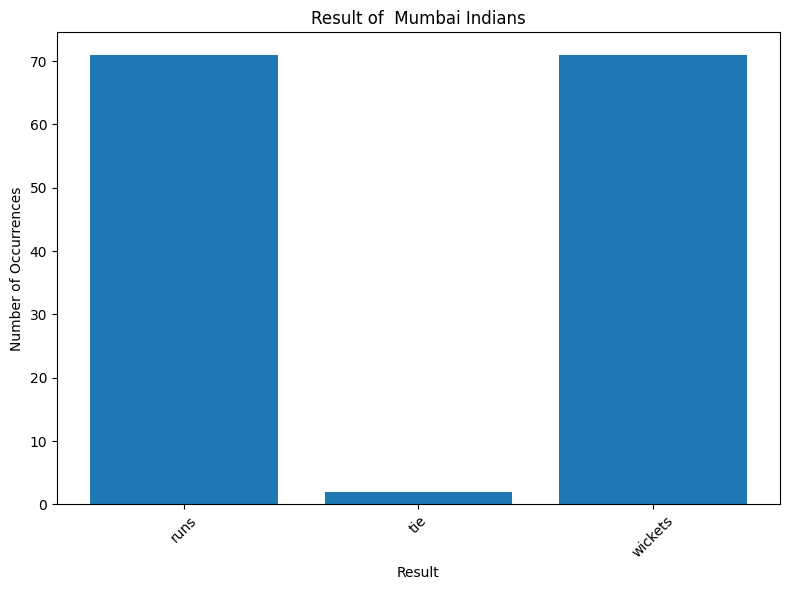

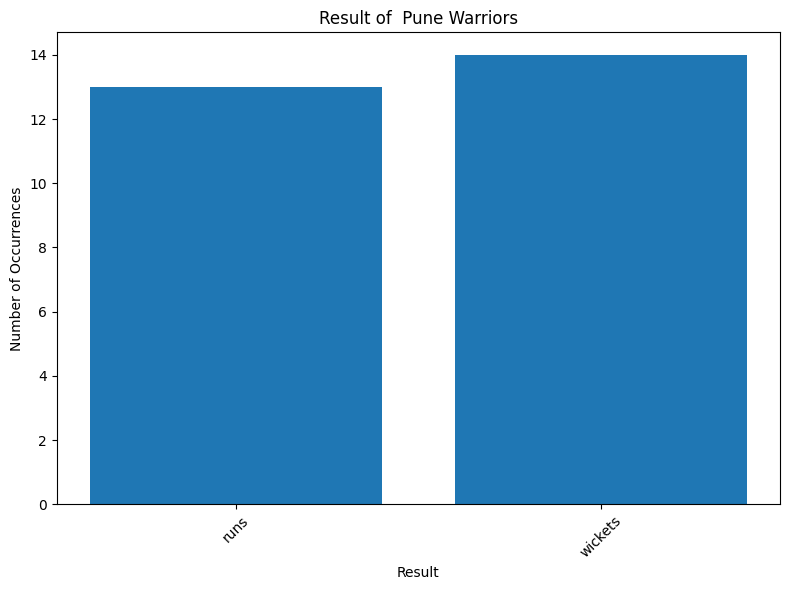

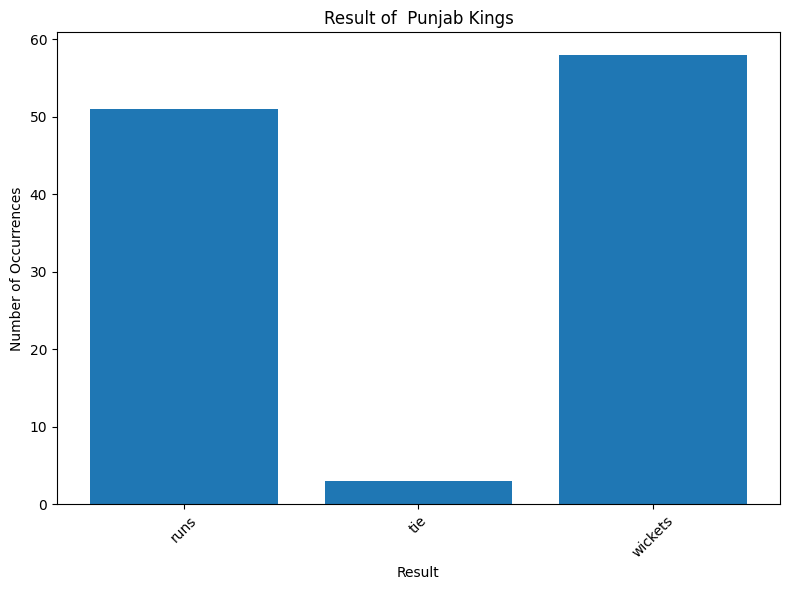

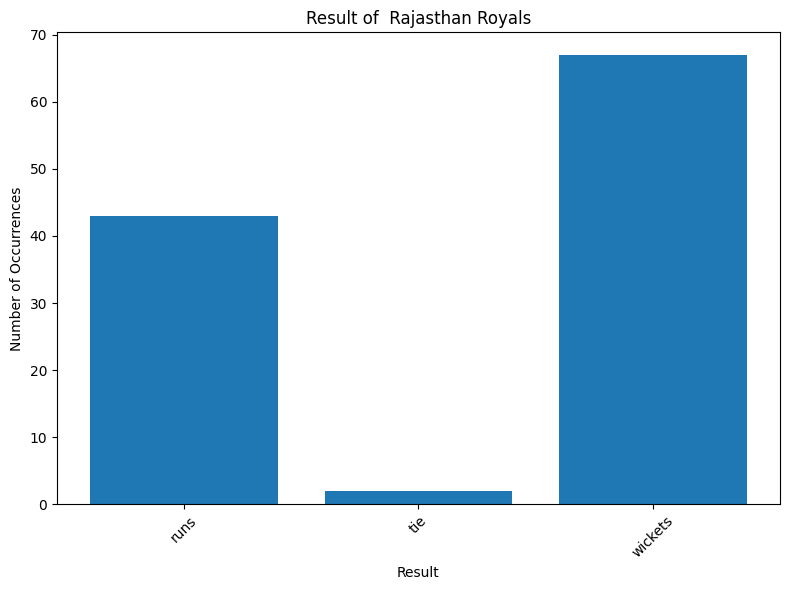

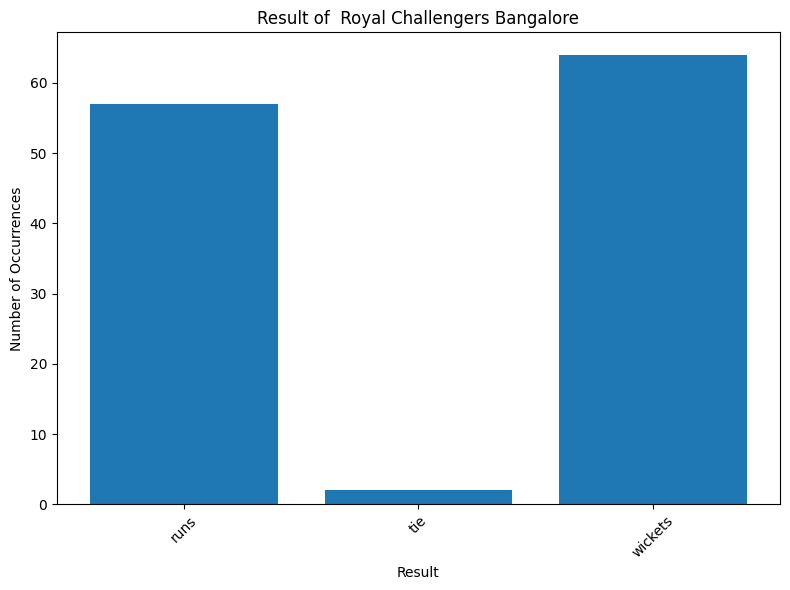

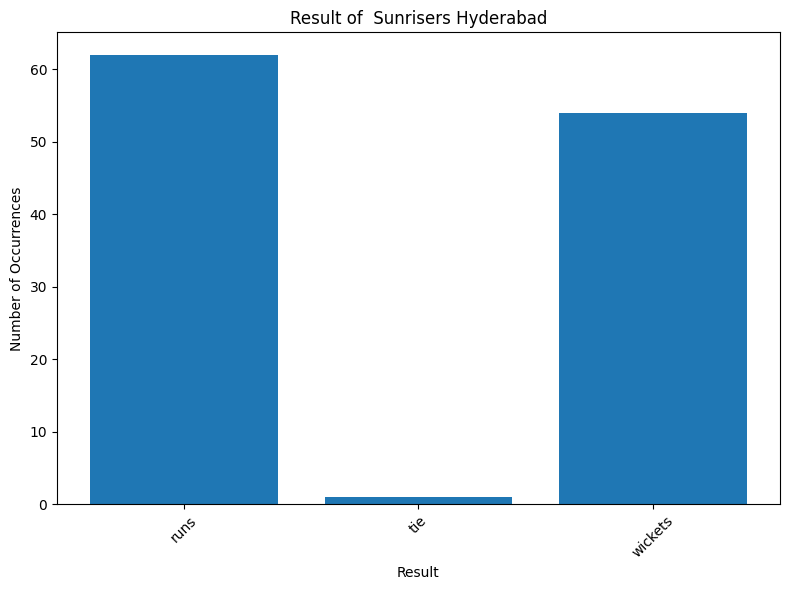

In [22]:
teams = grouped_team['winner'].unique()  

for w in teams:
    team_data = grouped_team[grouped_team['winner'] == w]

    plt.figure(figsize=(8, 6))
    plt.bar(team_data['result'], team_data['new_result'])
    plt.title(f"Result of  {w}")
    plt.xlabel('Result')
    plt.ylabel('Number of Occurrences')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [23]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display

venue_dropdown = widgets.Dropdown(
    options=grouped['venue'].unique(),
    description='Select Venue:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

def plot_for_venue(selected_venue):
    venue_data = grouped[grouped['venue'] == selected_venue]
    plt.figure(figsize=(8, 6))
    plt.bar(venue_data['result'], venue_data['new_result'])
    plt.title(f"Result Occurrences at {selected_venue}")
    plt.xlabel('Result')
    plt.ylabel('Number of Occurrences')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

out = widgets.interactive_output(plot_for_venue, {'selected_venue': venue_dropdown})

display(venue_dropdown, out)


Dropdown(description='Select Venue:', layout=Layout(width='50%'), options=('Arun Jaitley Stadium', 'Arun Jaitl…

Output()